<a href="https://colab.research.google.com/github/Me-Rajdip/Machine-Learning-Project-By-Me/blob/main/Product_URL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required libraries**

In [7]:
!pip install squarify
!pip install pygal
!pip install bokeh
!pip install altair
!pip install networkx
!pip install wordcloud
!pip install missingno
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import squarify
import pygal
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import altair as alt
import networkx as nx
from wordcloud import WordCloud
import missingno as msno
from pandas.plotting import parallel_coordinates, andrews_curves, radviz

from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier


import re
from collections import Counter
import joblib

import warnings
warnings.filterwarnings("ignore")

# Text processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Set random seed for reproducibility
np.random.seed(42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


***Convert the provided data into a DataFrame***

In [9]:
data = [
    # Product URLs (50 samples)
    ("https://www.amazon.in/dp/B09G99CW2T", "product"),
    ("https://www.amazon.in/Apple-iPhone-13-128GB-Blue/dp/B09G99CW2T", "product"),
    ("https://www.amazon.in/Noise-Launched-Bluetooth-Calling-Tracking/dp/B0BJ72WZQ7?th=1", "product"),
    ("https://www.amazon.in/dp/B0C3XGJWQ7", "product"),
    ("https://www.amazon.in/dp/B07WFPMKD7", "product"),
    ("https://www.amazon.in/dp/B09SH994JW", "product"),
    ("https://www.amazon.in/dp/B08444S68M", "product"),
    ("https://www.amazon.in/dp/B07DJHXTLJ", "product"),
    ("https://www.amazon.in/dp/B07VJYZF59", "product"),
    ("https://www.amazon.in/dp/B08444S5JD", "product"),
    ("https://www.flipkart.com/apple-iphone-13-blue-128-gb/p/itm6e3b5b5a7cfd9", "product"),
    ("https://www.flipkart.com/noise-crew-1-38-round-display-bluetooth-calling-metallic-finish-ip68-rating-smartwatch/p/itm9eb2931827255", "product"),
    ("https://www.flipkart.com/redmi-note-12-pro-5g-icy-blue-128-gb/p/itm76d1e3ec4dd33", "product"),
    ("https://www.flipkart.com/samsung-galaxy-m14-5g-smoky-teal-128-gb/p/itm1d1b761621bba", "product"),
    ("https://www.flipkart.com/dell-inspiron-core-i5-11th-gen/p/itm2ba7566b9c6d7", "product"),
    ("https://www.acer.com/aspire-7-ryzen-5-hexa-core", "product"),
    ("https://www.hp.com/pavilion-intel-core-i5-12th-gen", "product"),
    ("https://www.asus.com/vivobook-15-core-i3-12th-gen", "product"),
    ("https://www.boat-lifestyle.com/airdopes-121v2-bluetooth-headset", "product"),
    ("https://www.sony.com/wh-1000xm4-bluetooth-headset", "product"),
    ("https://www.jbl.com/c100si-wired-headset", "product"),
    ("https://www.realme.com/buds-wireless-2-neo-bluetooth-headset", "product"),
    ("https://www.mi.com/dual-driver-wired-headset", "product"),
    ("https://www.amazon.in/dp/B08N5WRWNW", "product"),
    ("https://www.amazon.in/dp/B08N5VSQNG", "product"),
    ("https://www.amazon.in/dp/B097R87DF3", "product"),
    ("https://www.amazon.in/dp/B09GFPVD5J", "product"),
    ("https://www.amazon.in/dp/B08P9KJ1N7", "product"),
    ("https://www.amazon.in/dp/B08P9KW3CD", "product"),
    ("https://www.amazon.in/dp/B07WSY6VGT", "product"),
    ("https://www.amazon.in/dp/B07WSYGVGZ", "product"),
    ("https://www.amazon.in/dp/B07Y5Y3M89", "product"),
    ("https://www.amazon.in/dp/B08H7Z21KF", "product"),
    ("https://www.amazon.in/dp/B09WRM9SKD", "product"),
    ("https://www.amazon.in/dp/B0B3R7FZHC", "product"),
    ("https://www.amazon.in/dp/B097R8FYW4", "product"),
    ("https://www.amazon.in/dp/B08N5W4NNB", "product"),
    ("https://www.amazon.in/dp/B07DJHXTLJ", "product"),
    ("https://www.google.com/shopping/product/16848581607082948437", "product"),
    ("https://www.google.com/shopping/product/9432095483203456234", "product"),
    ("https://www.google.com/shopping/product/13987502839485738457", "product"),
    ("https://www.google.com/shopping/product/98435798457384957834", "product"),
    ("https://www.google.com/shopping/product/84579028475902845739", "product"),
    ("https://www.google.com/shopping/product/92845793485739485723", "product"),
    ("https://www.google.com/shopping/product/48975938475029485702", "product"),
    ("https://www.google.com/shopping/product/53984579384579384579", "product"),
    ("https://www.google.com/shopping/product/53984579384579384579", "product"),
    ("https://www.google.com/shopping/product/93485792384792384792", "product"),
    ("https://www.google.com/shopping/product/32847923487923487234", "product"),
    # Not Product URLs (50 samples)
    ("https://www.amazon.in/s?k=noise+crew+smartwatch+1.38", "not_product"),
    ("https://www.flipkart.com/search?q=noise+watch", "not_product"),
    ("https://www.amazon.in/gp/bestsellers/electronics/976419031", "not_product"),
    ("https://www.flipkart.com/wearable-smart-devices/smart-watches/noise~brand/pr?sid=ajy%2Cbuh", "not_product"),
    ("https://www.flipkart.com/mens-watches/pr?sid=r18,f13", "not_product"),
    ("https://www.amazon.in/gp/goldbox", "not_product"),
    ("https://www.flipkart.com/offers-store", "not_product"),
    ("https://www.amazon.in/b/?node=976419031", "not_product"),
    ("https://www.flipkart.com/electronics-store", "not_product"),
    ("https://www.amazon.in/s?k=smartphones", "not_product"),
    ("https://www.google.com/search?q=iphone+13", "not_product"),
    ("https://www.google.com/search?q=best+laptop+under+60000", "not_product"),
    ("https://www.google.com/shopping", "not_product"),
    ("https://www.google.com/search?q=buy+noise+smartwatch", "not_product"),
    ("https://www.google.com/shopping/search?q=noise+watch", "not_product"),
    ("https://www.flipkart.com/smart-watches/pr?sid=ajy,buh", "not_product"),
    ("https://www.flipkart.com/laptops-store", "not_product"),
    ("https://www.amazon.in/smart-watches/b?ie=UTF8&node=5605728031", "not_product"),
    ("https://www.amazon.in/gp/new-releases", "not_product"),
    ("https://www.amazon.in/Deals/sale", "not_product"),
    ("https://www.amazon.in/s?k=laptop+under+50000", "not_product"),
    ("https://www.flipkart.com/search?q=laptop+under+50000", "not_product"),
    ("https://www.flipkart.com/sell-online", "not_product"),
    ("https://www.flipkart.com/helpcentre", "not_product"),
    ("https://www.flipkart.com/about-us", "not_product"),
    ("https://www.amazon.in/gp/help/customer/display.html", "not_product"),
    ("https://www.amazon.in/gp/cart/view.html", "not_product"),
    ("https://www.amazon.in/gp/browse.html?node=1389401031", "not_product"),
    ("https://www.amazon.in/s?k=headphones", "not_product"),
    ("https://www.flipkart.com/headphones-store", "not_product"),
    ("https://www.flipkart.com/smartphones-store", "not_product"),
    ("https://www.amazon.in/b?node=1389432031", "not_product"),
    ("https://www.amazon.in/s?k=gaming+laptop", "not_product"),
    ("https://www.flipkart.com/search?q=wireless+headphones", "not_product"),
    ("https://www.flipkart.com/offers", "not_product"),
    ("https://www.flipkart.com/dmart", "not_product"),
    ("https://www.amazon.in/dmart-store", "not_product"),
    ("https://www.amazon.in/s?k=fitness+band", "not_product"),
    ("https://www.flipkart.com/search?q=fitness+band", "not_product"),
    ("https://www.google.com/search?q=macbook+air+vs+pro", "not_product"),
    ("https://www.google.com/search?q=flipkart+noise+watch+offer", "not_product"),
    ("https://www.google.com/search?q=top+phones+2025", "not_product"),
    ("https://www.google.com/shopping/search?q=budget+phones+2025", "not_product"),
    ("https://www.google.com/shopping/search?q=fitness+trackers", "not_product"),
    ("https://www.google.com/shopping/search?q=cheap+earbuds", "not_product"),
    ("https://www.google.com/shopping/search?q=best+bluetooth+speakers", "not_product"),
    ("https://www.google.com/shopping/search?q=compare+noise+vs+boat", "not_product"),
    ("https://www.google.com/shopping/search?q=kids+smart+watch", "not_product"),
    ("https://www.google.com/shopping/search?q=best+fitness+smartwatch", "not_product"),
    ("https://www.bunzlchs.com/Hygiene-Paper-and-Wipes/Toilet-Tissue/Toilet-Tissue-Dispensers-and-Holders~c~BCHSAPA", "not_product"),
    ("https://www.myntra.com/smart-watches/noise/noise-crew-with-bt-calling--metallic-finish-ip68-rating-138-round-display-smartwatch/23529198/buy", "product"),
    ("https://www.myntra.com/smart-watches/noise/noise-crew-with-bt-calling--metallic-finish-ip68-rating-138-round-display-smartwatch/23529198/buy", "product"),
    ("https://www.ahpmedicals.com/tork-mini-jumbo-toilet-roll-dispenser-white-pack-of-1.html", "product"),
    ("https://janitorialessentials.com/paper-products/jumbo-toilet-tissue", "not_product"),
]

# Create DataFrame
df = pd.DataFrame(data, columns=['url', 'label'])

***Basic data exploration***

In [10]:
print(f"Total samples: {len(df)}")
print(f"Class distribution:\n{df['label'].value_counts()}")
print("\nSample URLs:")
print(df.sample(5))

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate URLs:")
print(df[df.duplicated(subset=['url'], keep=False)])

def extract_url_features(url):
    """Extract various features from a URL"""
    features = {}

    # Parse the URL
    parsed = urlparse(url)

    # 1. URL Structure Features
    features['domain'] = parsed.netloc
    features['path_depth'] = len(parsed.path.split('/')) - 1
    features['has_query'] = 1 if parsed.query else 0
    features['has_fragment'] = 1 if parsed.fragment else 0

    # Common product page patterns
    features['contains_dp'] = 1 if '/dp/' in url.lower() else 0
    features['contains_product'] = 1 if 'product' in url.lower() else 0
    features['contains_item'] = 1 if 'item' in url.lower() else 0
    features['contains_pid'] = 1 if 'pid=' in url.lower() else 0

    # File extensions
    features['has_html'] = 1 if url.lower().endswith('.html') else 0
    features['has_php'] = 1 if url.lower().endswith('.php') else 0

    # URL length features
    features['url_length'] = len(url)
    features['path_length'] = len(parsed.path)
    features['query_length'] = len(parsed.query)

    # Special patterns in path
    features['has_uuid'] = 1 if re.search(r'[0-9a-f]{8}-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{12}', url.lower()) else 0
    features['has_long_id'] = 1 if re.search(r'(p/|product/|dp/)[a-z0-9]{10,}', url.lower()) else 0

    # E-commerce platform specific features
    features['is_amazon'] = 1 if 'amazon.' in url.lower() else 0
    features['is_flipkart'] = 1 if 'flipkart.' in url.lower() else 0
    features['is_google_shopping'] = 1 if 'google.com/shopping/product' in url.lower() else 0

    # Text processing features
    url_text = url.lower()
    url_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', url_text)
    words = word_tokenize(url_text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Count keywords
    product_keywords = ['product', 'item', 'detail', 'buy', 'shop', 'store', 'dp', 'pid', 'id', 'sku']
    non_product_keywords = ['search', 'result', 'list', 'category', 'filter', 'sort', 'compare', 'view', 'cart', 'checkout']

    features['product_keyword_count'] = sum(1 for word in words if word in product_keywords)
    features['non_product_keyword_count'] = sum(1 for word in words if word in non_product_keywords)

    # Ensure cleaned_url_text is never empty
    cleaned_text = ' '.join(words) if words else 'url'  # Fallback to 'url' if empty
    features['cleaned_url_text'] = cleaned_text

    return features

# Apply feature extraction to all URLs
url_features = df['url'].apply(lambda x: pd.Series(extract_url_features(x)))
df = pd.concat([df, url_features], axis=1)


Total samples: 103
Class distribution:
label
product        52
not_product    51
Name: count, dtype: int64

Sample URLs:
                                                  url        label
30                https://www.amazon.in/dp/B07WSYGVGZ      product
67              https://www.amazon.in/gp/new-releases  not_product
62  https://www.google.com/search?q=buy+noise+smar...  not_product
47  https://www.google.com/shopping/product/934857...      product
42  https://www.google.com/shopping/product/845790...      product

Missing values:
url      0
label    0
dtype: int64

Duplicate URLs:
                                                   url    label
7                  https://www.amazon.in/dp/B07DJHXTLJ  product
37                 https://www.amazon.in/dp/B07DJHXTLJ  product
45   https://www.google.com/shopping/product/539845...  product
46   https://www.google.com/shopping/product/539845...  product
99   https://www.myntra.com/smart-watches/noise/noi...  product
100  https://www.myntra.

***Display the features : 30 Different Types of Visualizations***


Extracted features:
                                                 url    label         domain  \
0                https://www.amazon.in/dp/B09G99CW2T  product  www.amazon.in   
1  https://www.amazon.in/Apple-iPhone-13-128GB-Bl...  product  www.amazon.in   
2  https://www.amazon.in/Noise-Launched-Bluetooth...  product  www.amazon.in   
3                https://www.amazon.in/dp/B0C3XGJWQ7  product  www.amazon.in   
4                https://www.amazon.in/dp/B07WFPMKD7  product  www.amazon.in   

   path_depth  has_query  has_fragment  contains_dp  contains_product  \
0           2          0             0            1                 0   
1           3          0             0            1                 0   
2           3          1             0            1                 0   
3           2          0             0            1                 0   
4           2          0             0            1                 0   

   contains_item  contains_pid  ...  path_length  query_len

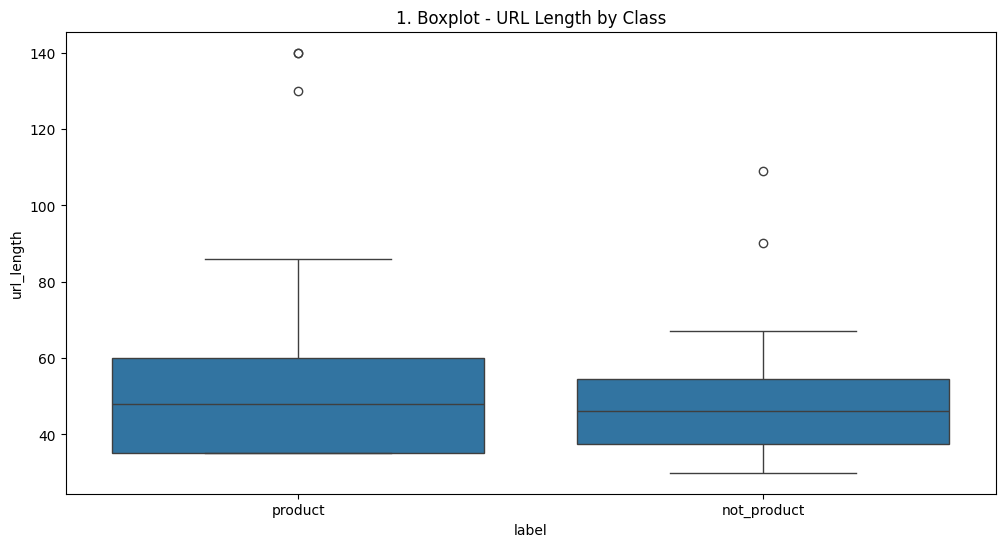

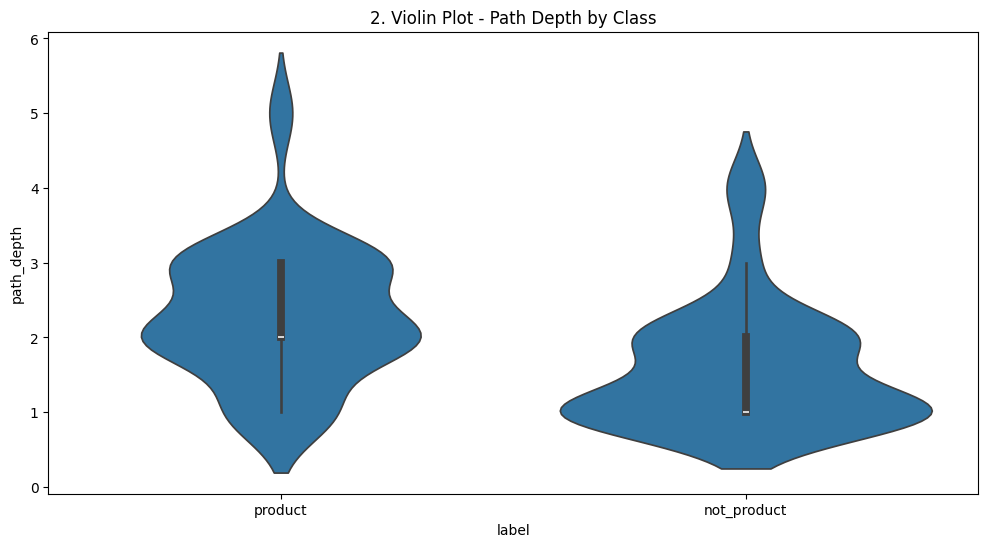

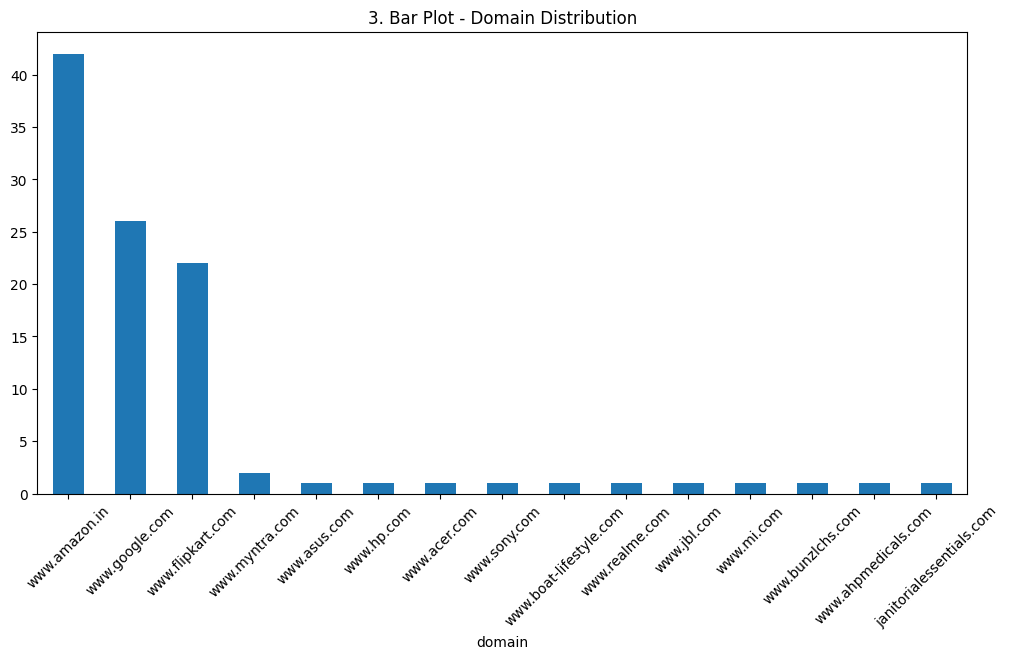

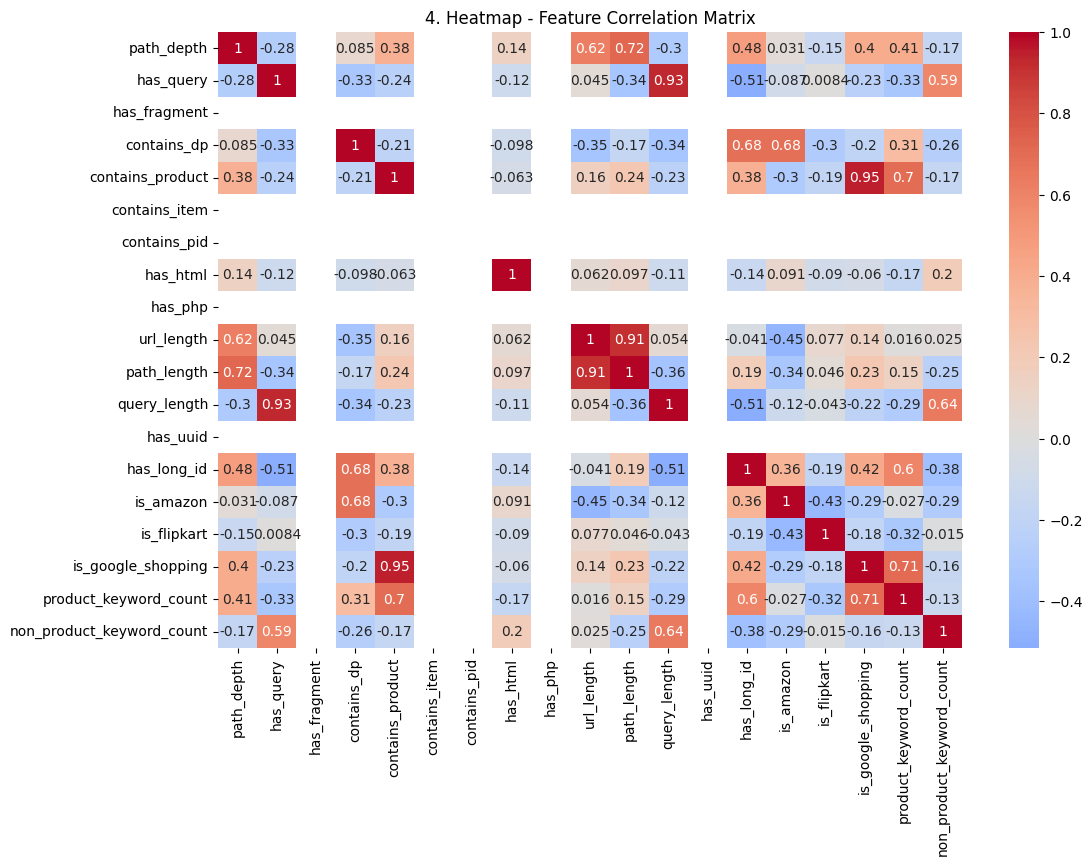

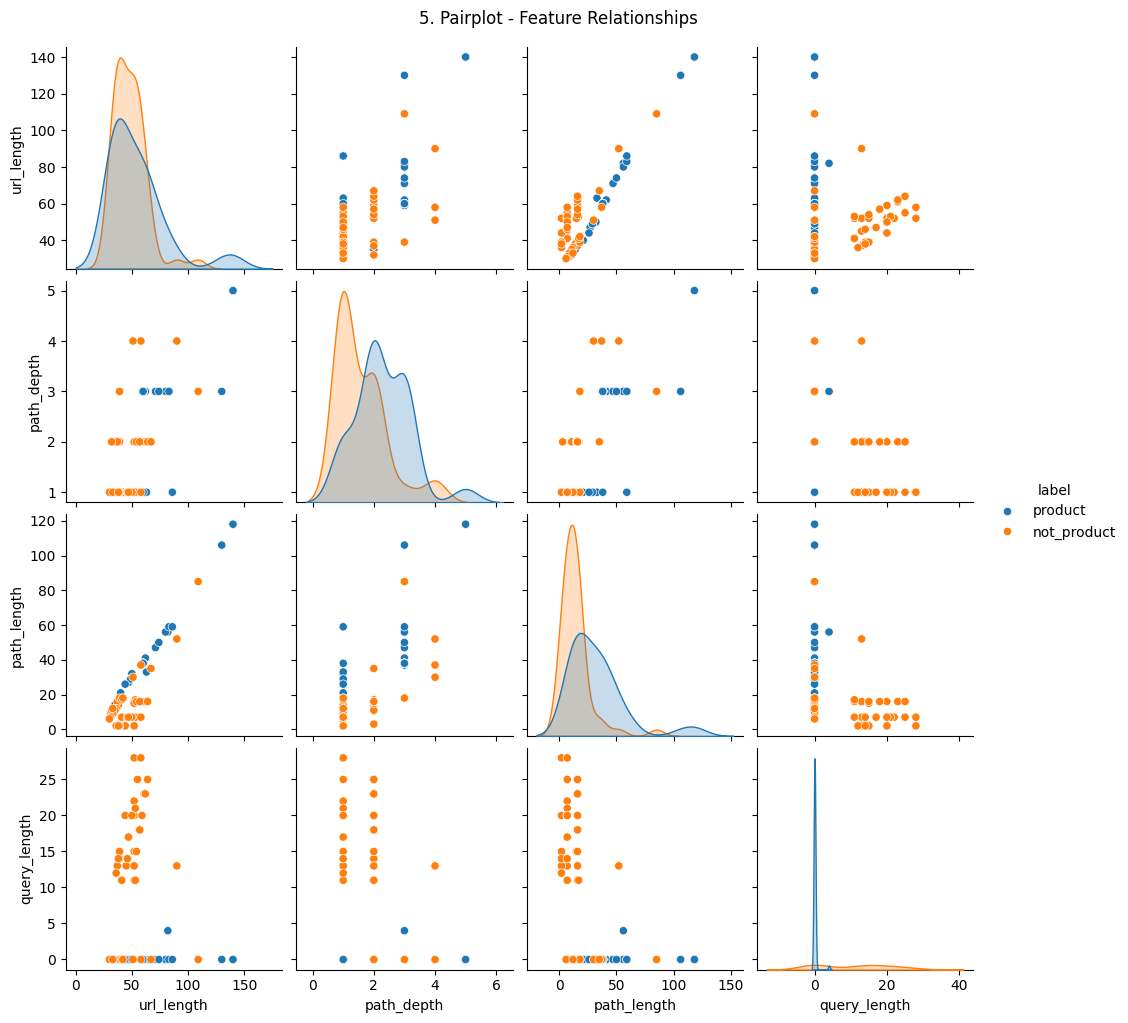

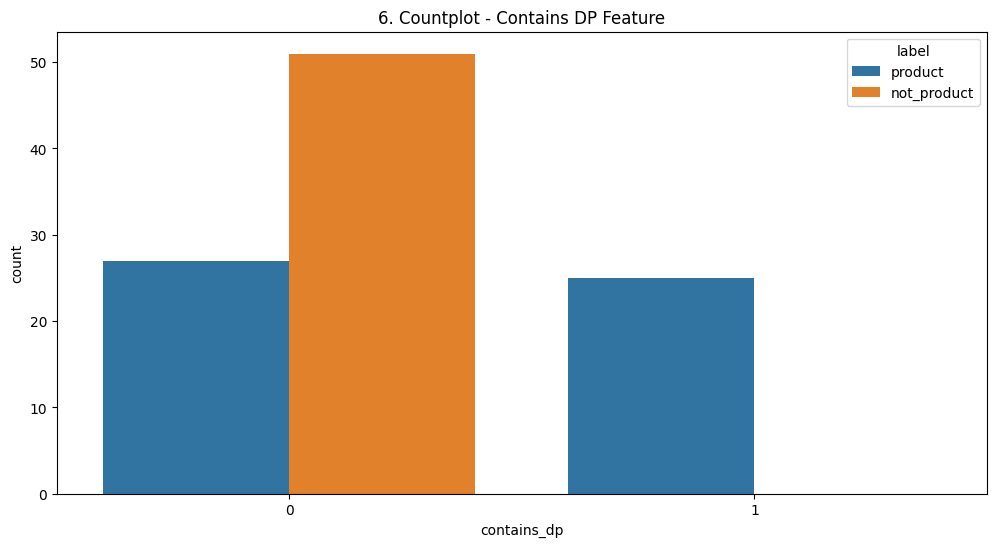

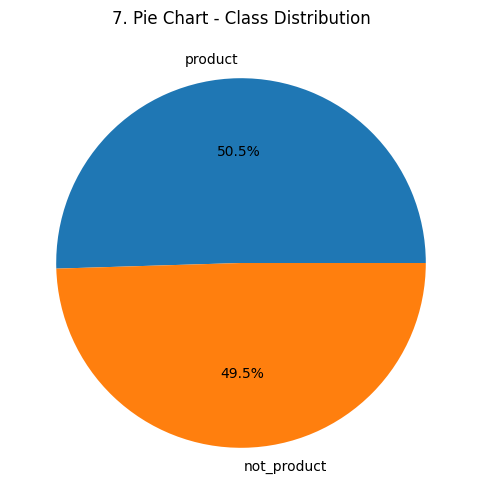

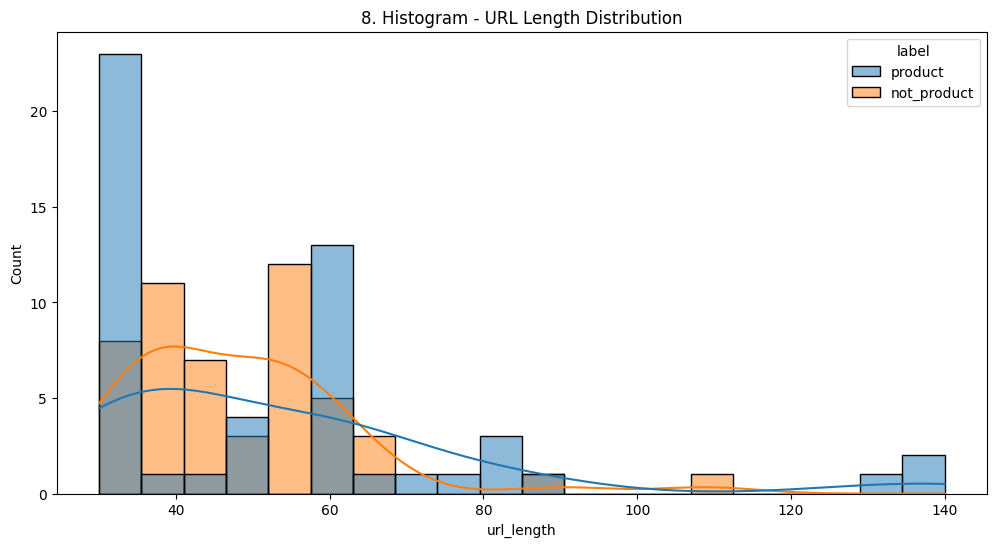

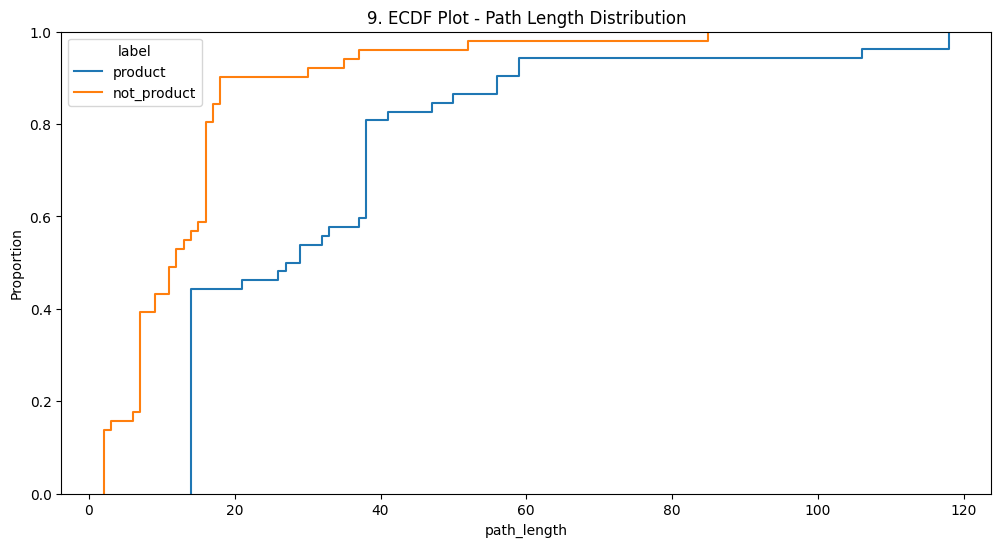

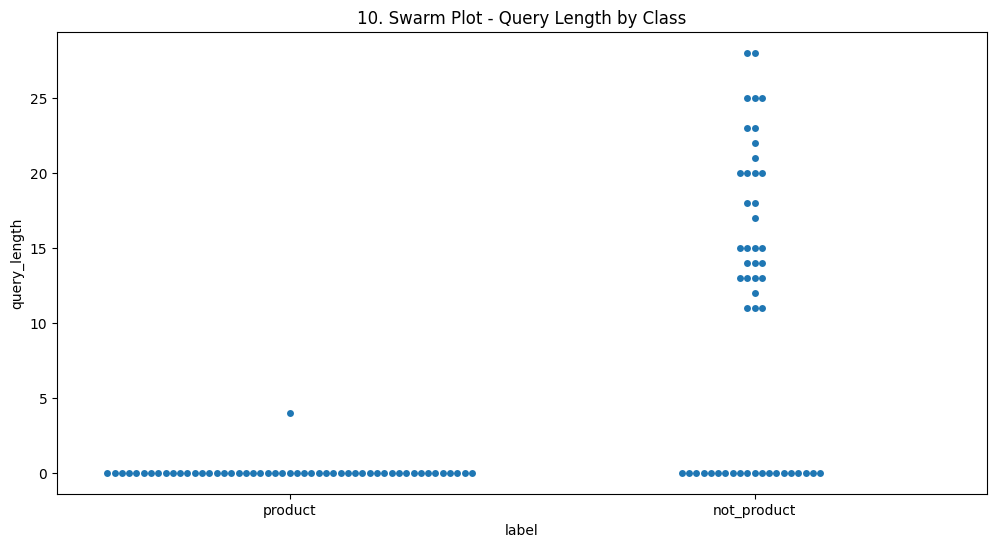

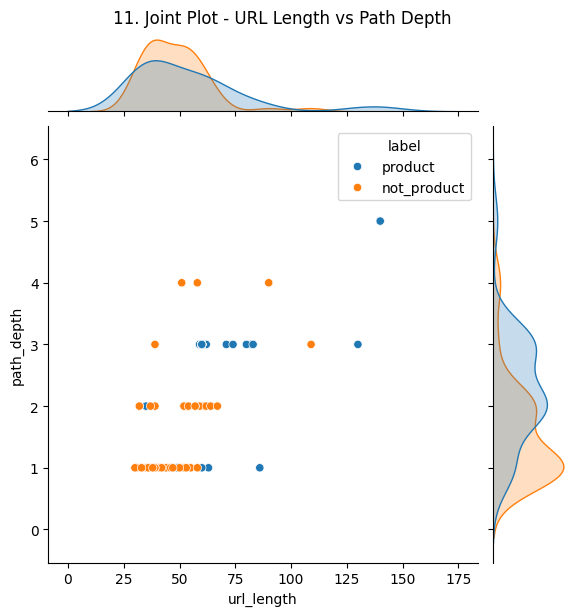

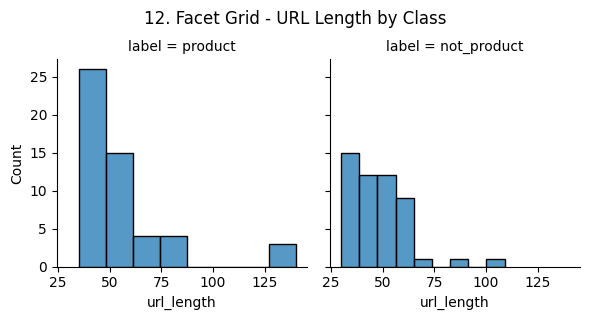

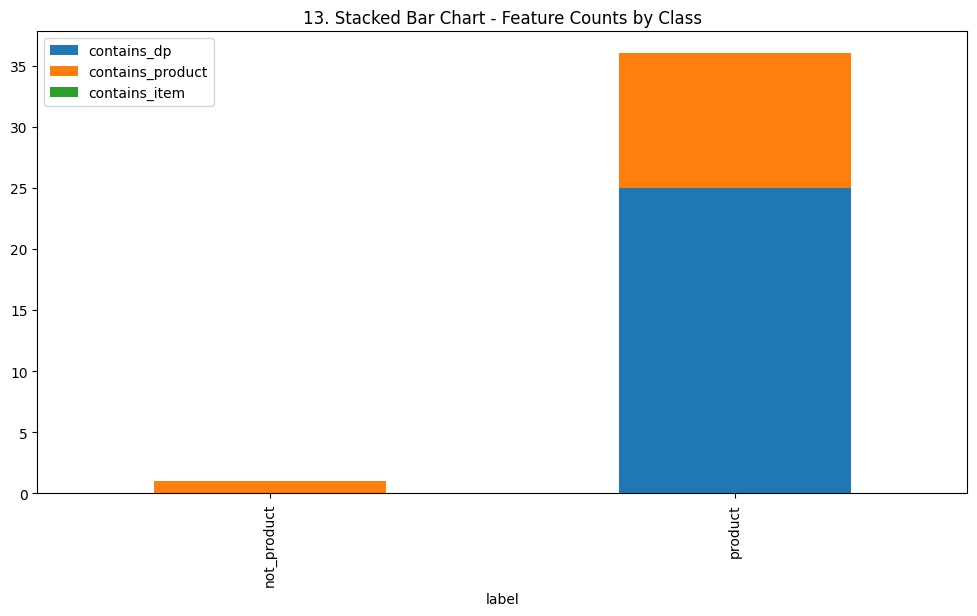

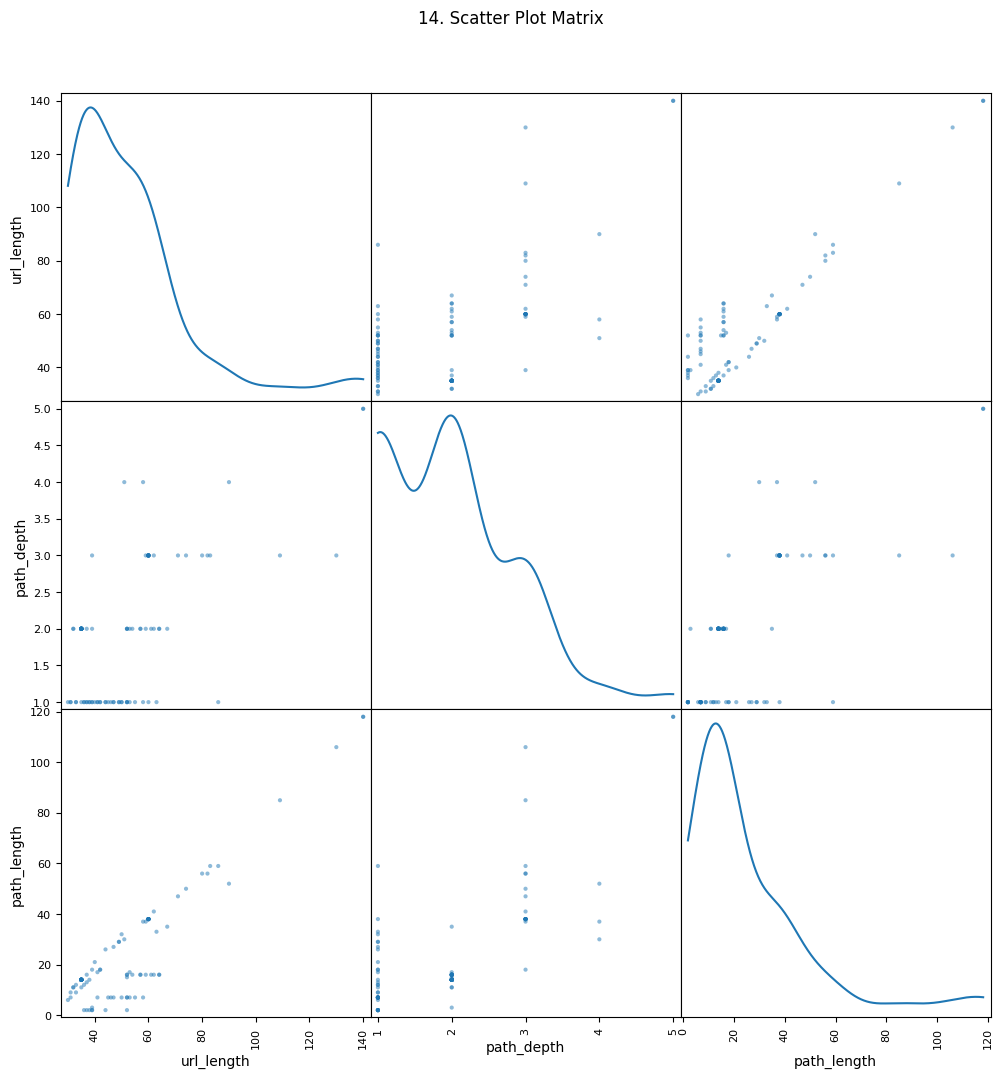

<Figure size 1200x600 with 0 Axes>

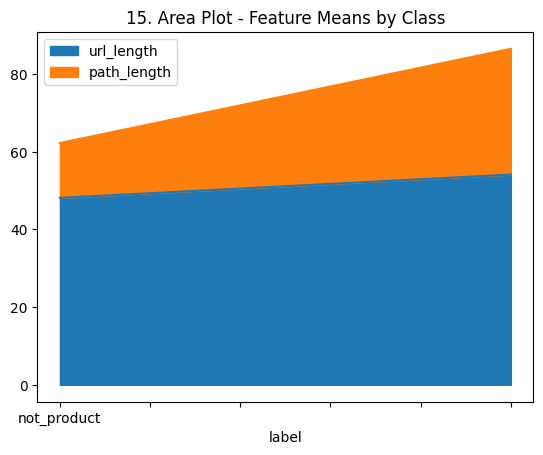

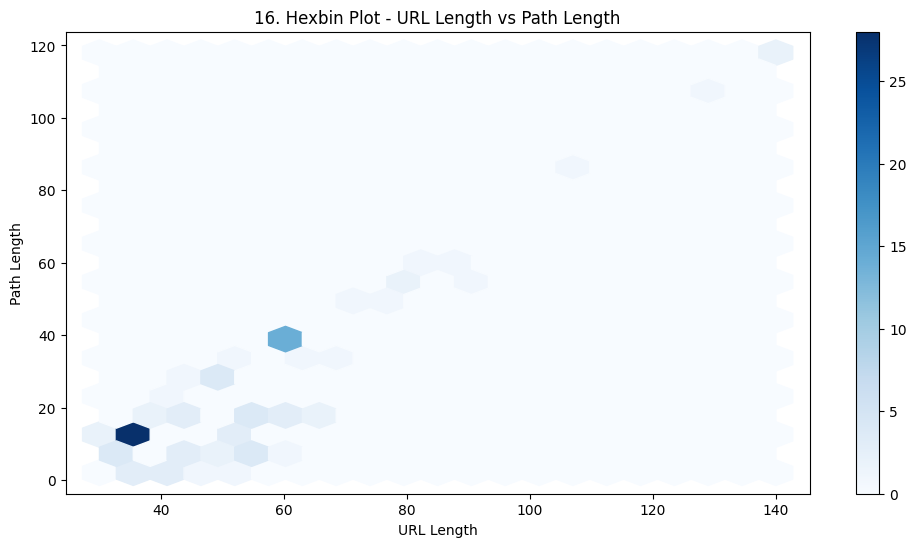

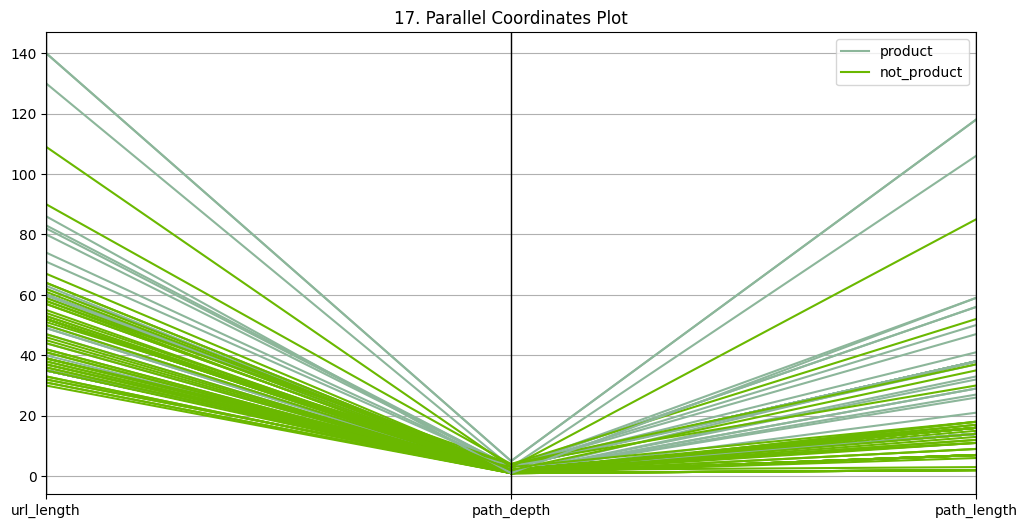

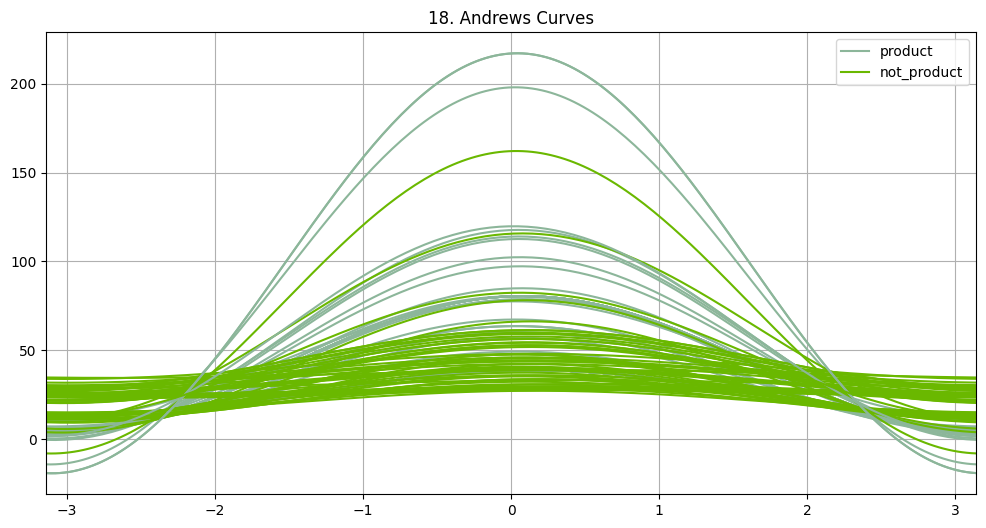

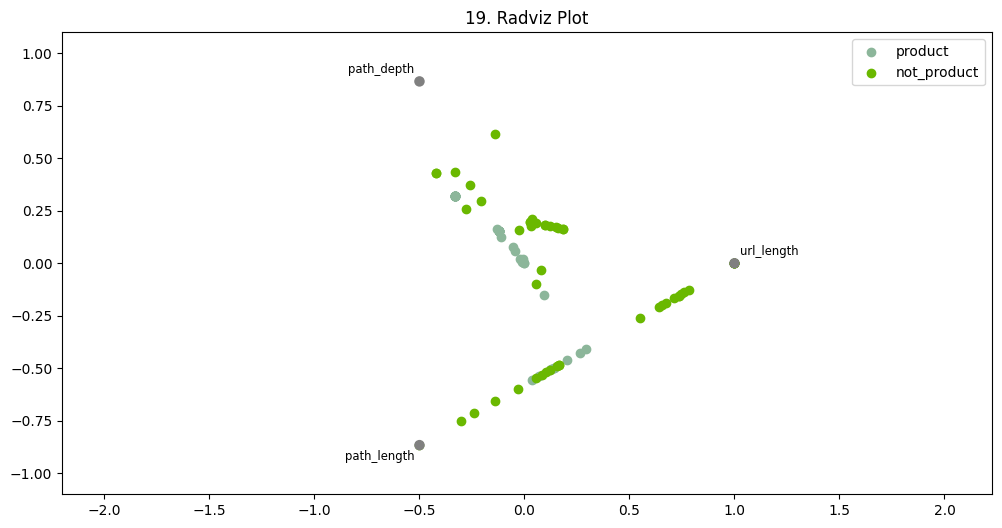

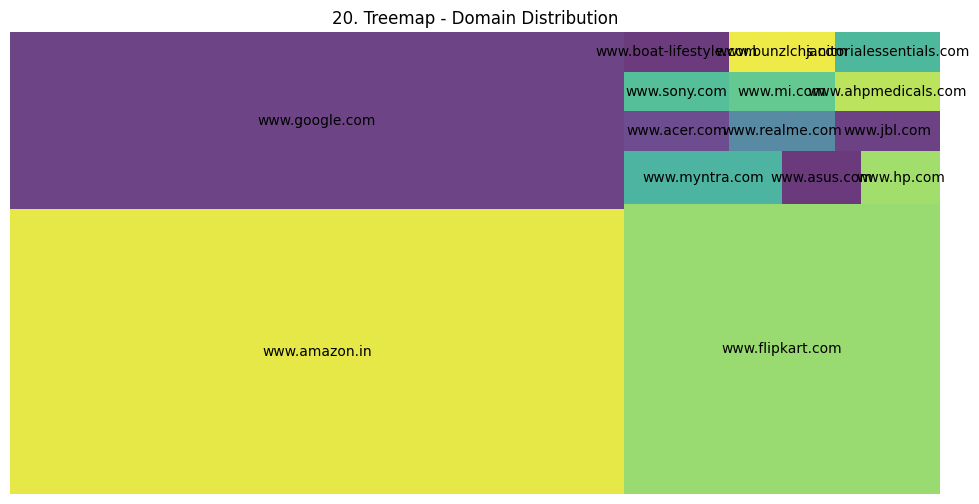

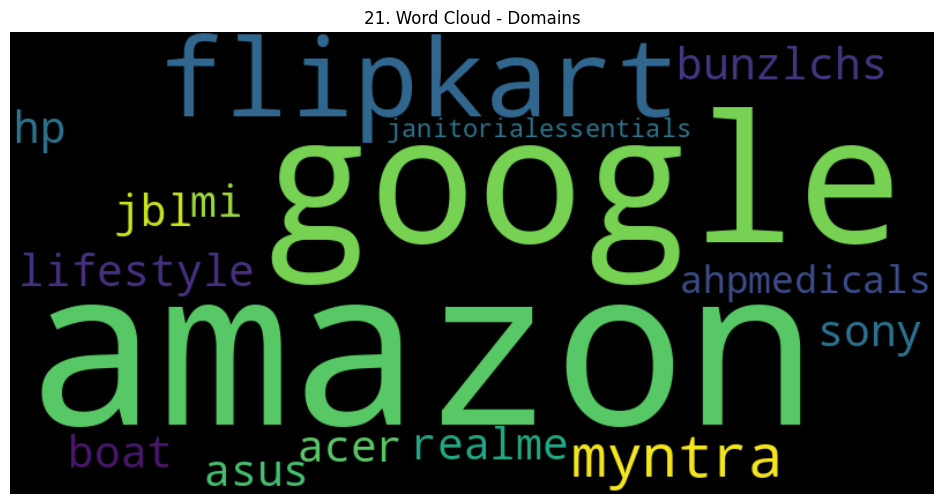

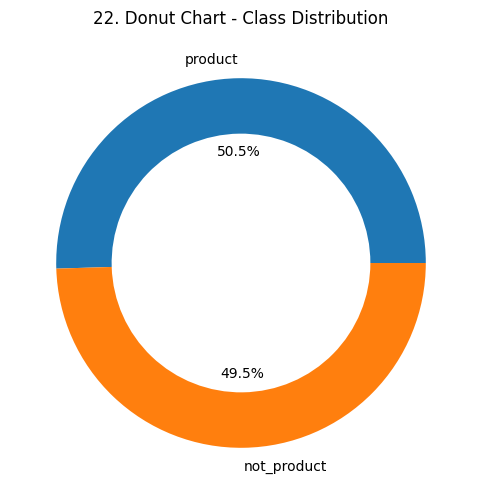

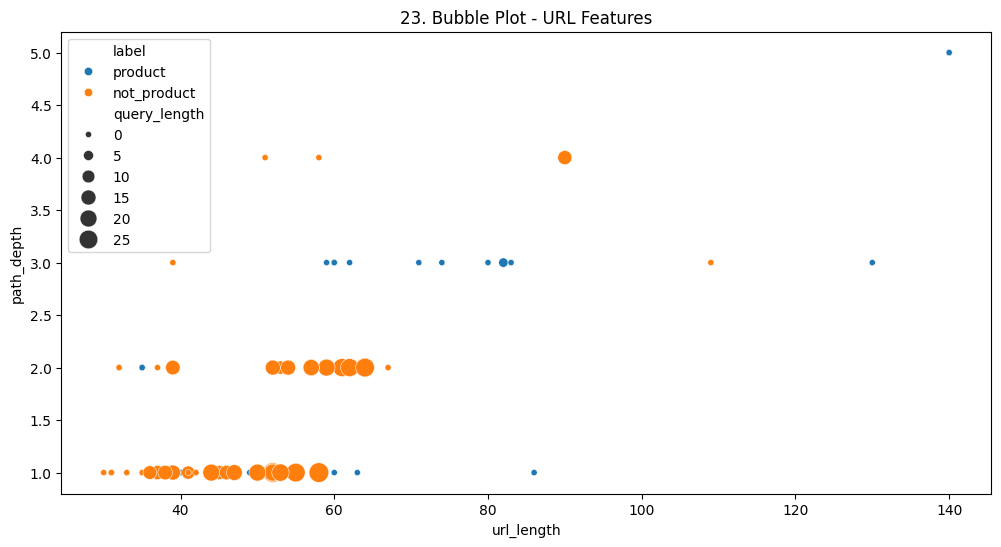

<Figure size 1200x600 with 0 Axes>

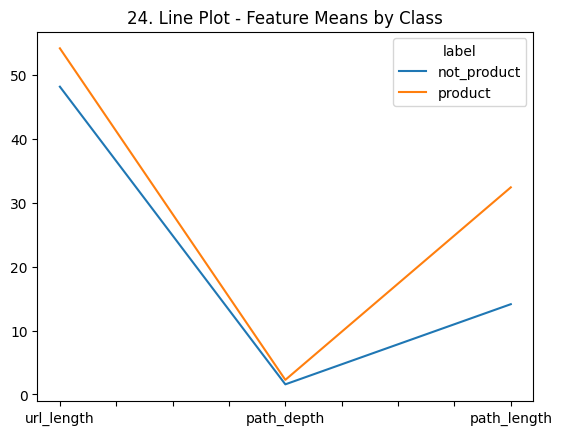

<Figure size 1200x600 with 0 Axes>

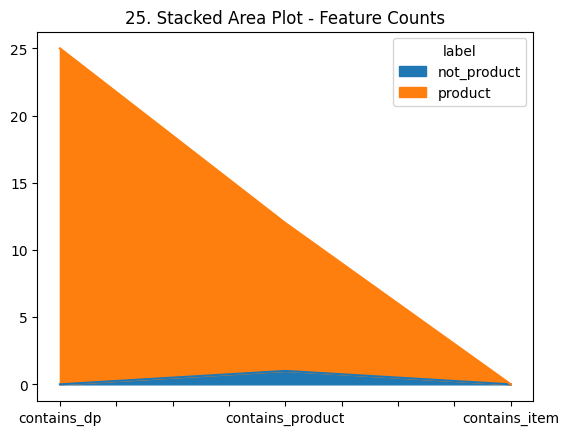

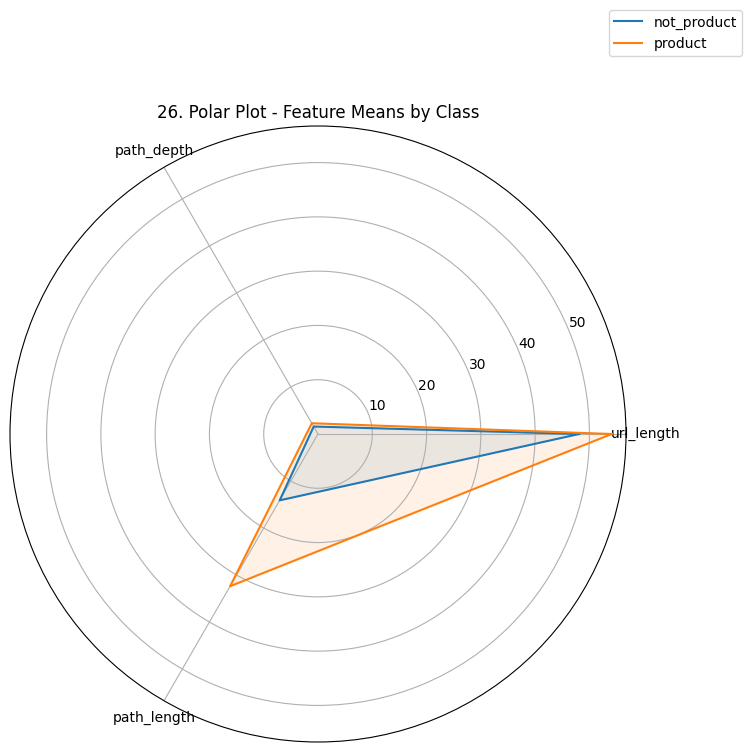

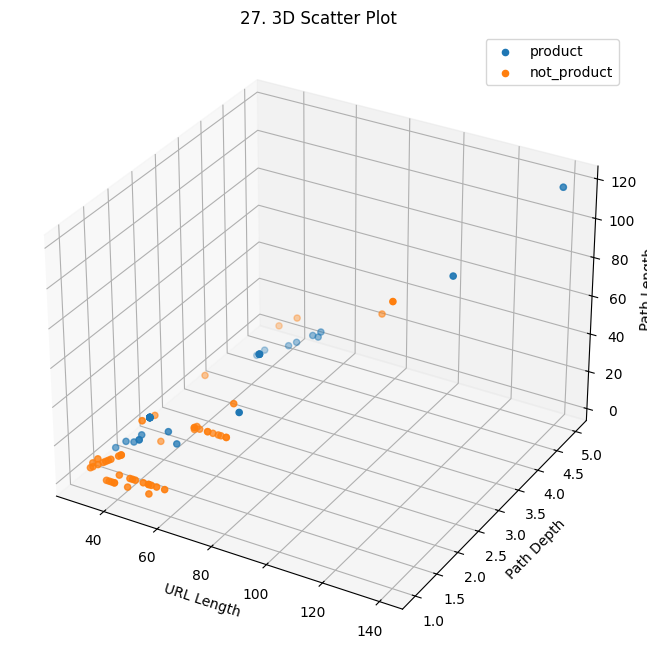

In [11]:
# Display the features
print("\nExtracted features:")
print(df.head())

# 1. Boxplot - URL length by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='url_length', data=df)
plt.title('1. Boxplot - URL Length by Class')
plt.show()

# 2. Violin plot - Path depth by class
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='path_depth', data=df)
plt.title('2. Violin Plot - Path Depth by Class')
plt.show()

# 3. Bar plot - Domain distribution
plt.figure(figsize=(12, 6))
df['domain'].value_counts().plot(kind='bar')
plt.title('3. Bar Plot - Domain Distribution')
plt.xticks(rotation=45)
plt.show()

# 4. Heatmap - Feature correlations
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('4. Heatmap - Feature Correlation Matrix')
plt.show()

# 5. Pairplot - Feature relationships
sns.pairplot(df[['url_length', 'path_depth', 'path_length', 'query_length', 'label']], hue='label')
plt.suptitle('5. Pairplot - Feature Relationships', y=1.02)
plt.show()

# 6. Countplot - Binary features
plt.figure(figsize=(12, 6))
sns.countplot(x='contains_dp', hue='label', data=df)
plt.title('6. Countplot - Contains DP Feature')
plt.show()

# 7. Pie chart - Class distribution
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('7. Pie Chart - Class Distribution')
plt.ylabel('')
plt.show()

# 8. Histogram - URL length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='url_length', hue='label', kde=True, bins=20)
plt.title('8. Histogram - URL Length Distribution')
plt.show()

# 9. ECDF plot - Path length
plt.figure(figsize=(12, 6))
sns.ecdfplot(data=df, x='path_length', hue='label')
plt.title('9. ECDF Plot - Path Length Distribution')
plt.show()

# 10. Swarm plot - Query length by class
plt.figure(figsize=(12, 6))
sns.swarmplot(x='label', y='query_length', data=df)
plt.title('10. Swarm Plot - Query Length by Class')
plt.show()

# 11. Joint plot - URL length vs path depth
sns.jointplot(data=df, x='url_length', y='path_depth', hue='label')
plt.suptitle('11. Joint Plot - URL Length vs Path Depth', y=1.02)
plt.show()

# 12. Facet grid - Multiple distributions
g = sns.FacetGrid(df, col='label')
g.map(sns.histplot, 'url_length')
g.fig.suptitle('12. Facet Grid - URL Length by Class', y=1.05)
plt.show()

# 13. Stacked bar chart - Features by class
feature_counts = df.groupby('label')[['contains_dp', 'contains_product', 'contains_item']].sum()
feature_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('13. Stacked Bar Chart - Feature Counts by Class')
plt.show()

# 14. Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df[['url_length', 'path_depth', 'path_length']], figsize=(12, 12), diagonal='kde')
plt.suptitle('14. Scatter Plot Matrix', y=0.95)
plt.show()

# 15. Area plot - Feature trends
plt.figure(figsize=(12, 6))
df.groupby('label')[['url_length', 'path_length']].mean().plot(kind='area')
plt.title('15. Area Plot - Feature Means by Class')
plt.show()

# 16. Hexbin plot - URL length vs path length
plt.figure(figsize=(12, 6))
plt.hexbin(df['url_length'], df['path_length'], gridsize=20, cmap='Blues')
plt.colorbar()
plt.title('16. Hexbin Plot - URL Length vs Path Length')
plt.xlabel('URL Length')
plt.ylabel('Path Length')
plt.show()

# 17. Parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(df[['url_length', 'path_depth', 'path_length', 'label']], 'label')
plt.title('17. Parallel Coordinates Plot')
plt.show()

# 18. Andrews curves
plt.figure(figsize=(12, 6))
andrews_curves(df[['url_length', 'path_depth', 'path_length', 'label']], 'label')
plt.title('18. Andrews Curves')
plt.show()

# 19. Radviz plot
plt.figure(figsize=(12, 6))
radviz(df[['url_length', 'path_depth', 'path_length', 'label']], 'label')
plt.title('19. Radviz Plot')
plt.show()

# 20. Treemap (using squarify)
plt.figure(figsize=(12, 6))
domain_counts = df['domain'].value_counts()
squarify.plot(sizes=domain_counts.values, label=domain_counts.index, alpha=0.8)
plt.title('20. Treemap - Domain Distribution')
plt.axis('off')
plt.show()

# 21. Word cloud for domains
from wordcloud import WordCloud
text = ' '.join(df['domain'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('21. Word Cloud - Domains')
plt.axis('off')
plt.show()

# 22. Donut chart
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('22. Donut Chart - Class Distribution')
plt.ylabel('')
plt.show()

# 23. Bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='url_length', y='path_depth', size='query_length', hue='label', sizes=(20, 200))
plt.title('23. Bubble Plot - URL Features')
plt.show()

# 24. Line plot - Feature means by class
plt.figure(figsize=(12, 6))
df.groupby('label')[['url_length', 'path_depth', 'path_length']].mean().T.plot()
plt.title('24. Line Plot - Feature Means by Class')
plt.show()

# 25. Stacked area plot
plt.figure(figsize=(12, 6))
df.groupby('label')[['contains_dp', 'contains_product', 'contains_item']].sum().T.plot(kind='area')
plt.title('25. Stacked Area Plot - Feature Counts')
plt.show()

# 26. Polar plot - Fixed version
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
feature_means = df.groupby('label')[['url_length', 'path_depth', 'path_length']].mean()

# Create theta values (angles) for each feature
theta = np.linspace(0, 2*np.pi, len(feature_means.columns), endpoint=False)
theta = np.concatenate((theta, [theta[0]]))  # Close the loop by repeating first angle

for label, values in feature_means.iterrows():
    # Close the loop by repeating first value
    values = np.concatenate((values.values, [values.values[0]]))
    ax.plot(theta, values, label=label)
    ax.fill(theta, values, alpha=0.1)

# Set the xticks to be the feature names
plt.xticks(theta[:-1], feature_means.columns)
plt.title('26. Polar Plot - Feature Means by Class')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.show()

# 27. 3D Scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in df['label'].unique():
    subset = df[df['label'] == label]
    ax.scatter(subset['url_length'], subset['path_depth'], subset['path_length'], label=label)
ax.set_xlabel('URL Length')
ax.set_ylabel('Path Depth')
ax.set_zlabel('Path Length')
plt.title('27. 3D Scatter Plot')
plt.legend()
plt.show()

# 28. Interactive plot with Plotly
fig = px.scatter(df, x='url_length', y='path_depth', color='label',
                 title='28. Interactive Scatter Plot (Plotly)')
fig.show()

# 29. Interactive parallel coordinates with Plotly - Fixed version

# First create a numerical mapping for the labels
df['label_num'] = df['label'].map({'product': 1, 'not_product': 0})

fig = px.parallel_coordinates(df,
                             color='label_num',
                             dimensions=['url_length', 'path_depth', 'path_length'],
                             title='29. Interactive Parallel Coordinates (Plotly)',
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             labels={'label_num': 'Label (0=not_product, 1=product)'})
fig.show()

# 30. Sunburst chart with Plotly
domain_counts = df.groupby(['domain', 'label']).size().reset_index(name='counts')
fig = px.sunburst(domain_counts, path=['domain', 'label'], values='counts',
                  title='30. Sunburst Chart - Domain and Class Distribution')
fig.show()

***Model Development with Different Split Ratios***

Columns after feature extraction: ['url', 'label', 'domain', 'path_depth', 'has_query', 'has_fragment', 'contains_dp', 'contains_product', 'contains_item', 'contains_pid', 'has_html', 'has_php', 'url_length', 'path_length', 'query_length', 'has_uuid', 'has_long_id', 'is_amazon', 'is_flipkart', 'is_google_shopping', 'product_keyword_count', 'non_product_keyword_count', 'cleaned_url_text', 'label_num']

Final feature sets:
Numeric: ['path_depth', 'url_length', 'path_length', 'query_length', 'product_keyword_count', 'non_product_keyword_count']
Categorical: ['domain']
Binary: ['has_query', 'has_fragment', 'contains_dp', 'contains_product', 'contains_item', 'contains_pid', 'has_html', 'has_php', 'has_uuid', 'has_long_id', 'is_amazon', 'is_flipkart', 'is_google_shopping']
Text: ['cleaned_url_text']


Evaluating with split ratio: 90:10
X_train shape: (92, 21)
y_train shape: (92,)

Debugging transformers with shapes:
Input shape: (92, 21)

Testing transformer: num
Columns: ['path_depth', 'url

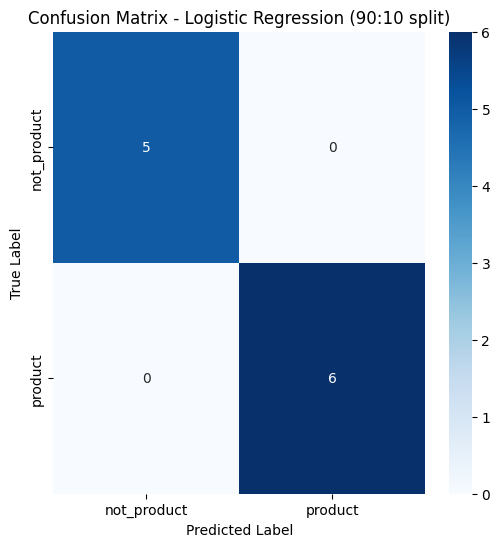


Evaluating Random Forest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report for Random Forest:
              precision    recall  f1-score   support

 not_product       1.00      1.00      1.00         5
     product       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



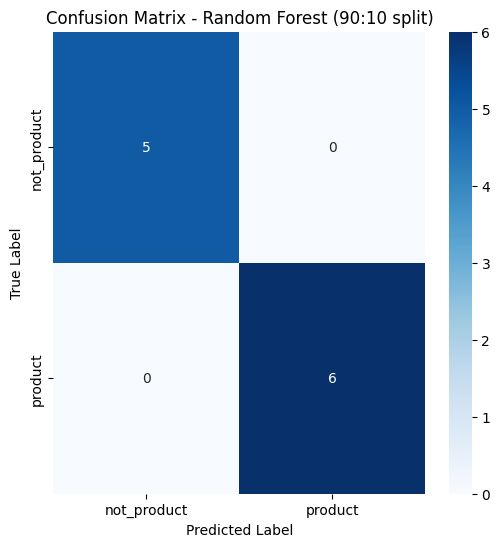


Evaluating SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Classification Report for SVM:
              precision    recall  f1-score   support

 not_product       1.00      1.00      1.00         5
     product       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



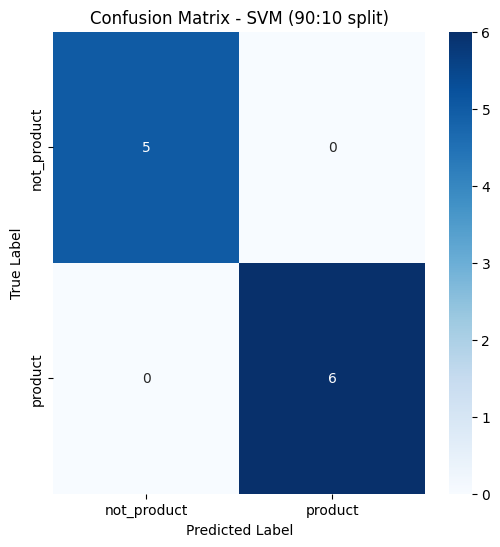


Evaluating LightGBM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 46, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

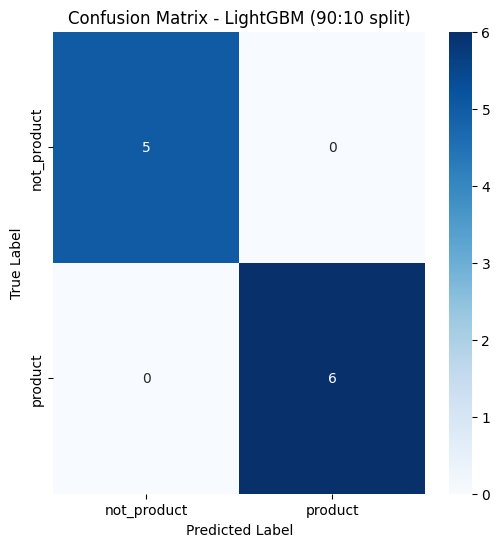


Evaluating CatBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report for CatBoost:
              precision    recall  f1-score   support

 not_product       1.00      1.00      1.00         5
     product       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



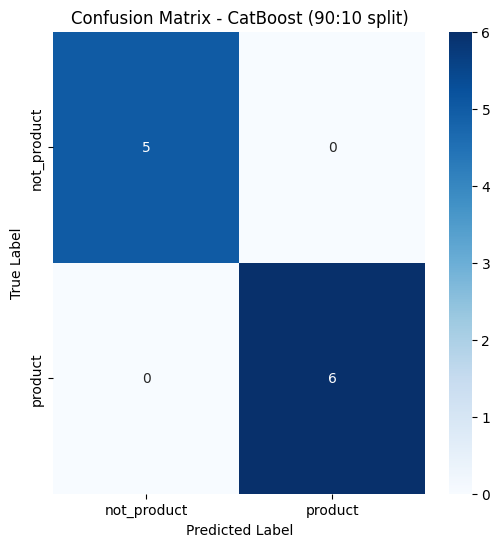


Evaluating AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Classification Report for AdaBoost:
              precision    recall  f1-score   support

 not_product       1.00      1.00      1.00         5
     product       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



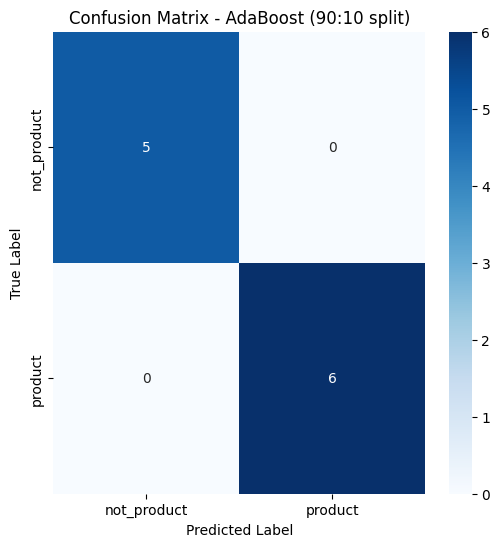


Evaluating Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

 not_product       1.00      1.00      1.00         5
     product       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



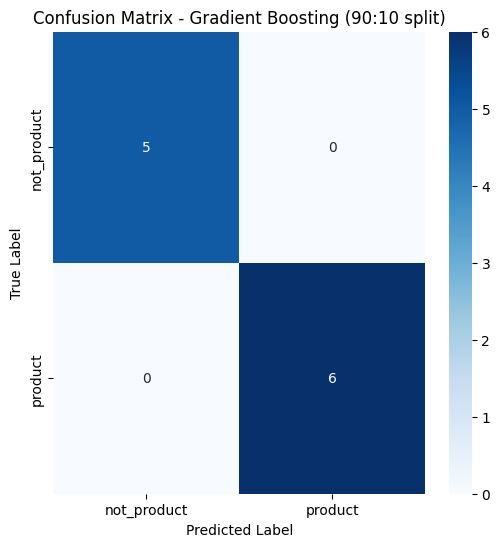


Model Comparison Results (90:10 split):
                 Model  CV Accuracy  Test Accuracy
0  Logistic Regression     0.967836            1.0
1        Random Forest     0.956725            1.0
2                  SVM     0.967836            1.0
3             LightGBM     0.923977            1.0
4             CatBoost     0.946199            1.0
5             AdaBoost     0.956725            1.0
6    Gradient Boosting     0.946784            1.0


Evaluating with split ratio: 80:20
X_train shape: (82, 21)
y_train shape: (82,)

Debugging transformers with shapes:
Input shape: (82, 21)

Testing transformer: num
Columns: ['path_depth', 'url_length', 'path_length', 'query_length', 'product_keyword_count', 'non_product_keyword_count']
Output shape: (82, 6)

Testing transformer: cat
Columns: ['domain']
Output shape: (82, 12)

Testing transformer: binary
Columns: ['has_query', 'has_fragment', 'contains_dp', 'contains_product', 'contains_item', 'contains_pid', 'has_html', 'has_php', 'has_uuid',

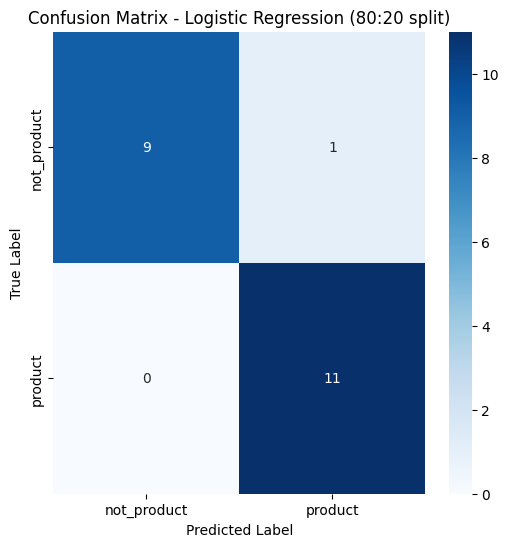


Evaluating Random Forest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report for Random Forest:
              precision    recall  f1-score   support

 not_product       1.00      0.90      0.95        10
     product       0.92      1.00      0.96        11

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



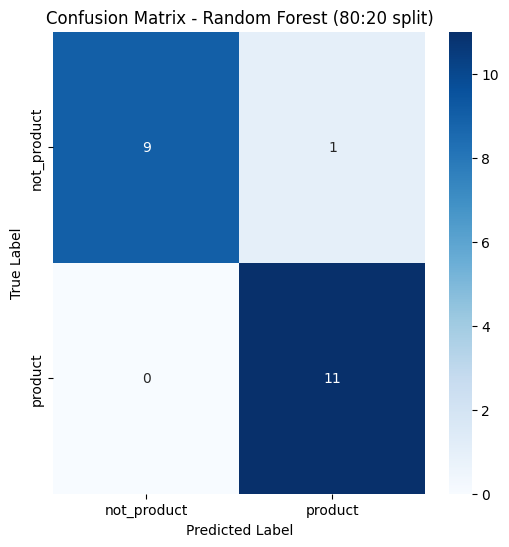


Evaluating SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Classification Report for SVM:
              precision    recall  f1-score   support

 not_product       1.00      1.00      1.00        10
     product       1.00      1.00      1.00        11

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



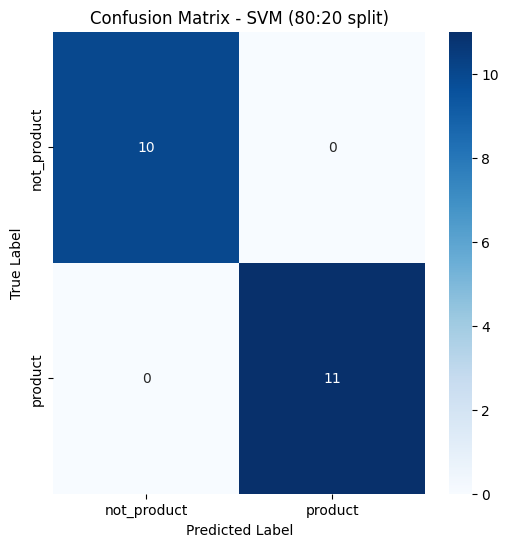


Evaluating LightGBM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 41, number of negative: 41
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 82, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

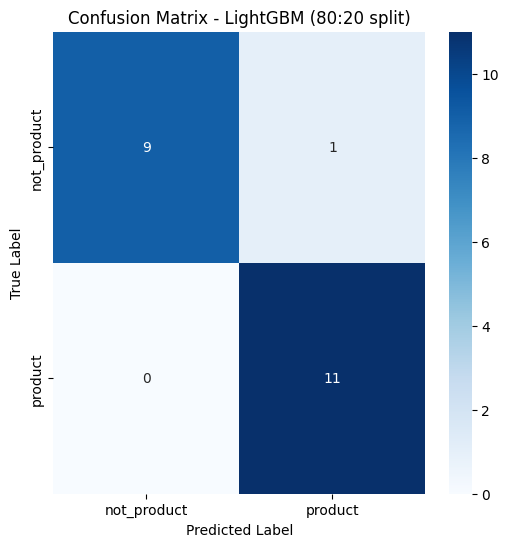


Evaluating CatBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report for CatBoost:
              precision    recall  f1-score   support

 not_product       1.00      0.90      0.95        10
     product       0.92      1.00      0.96        11

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



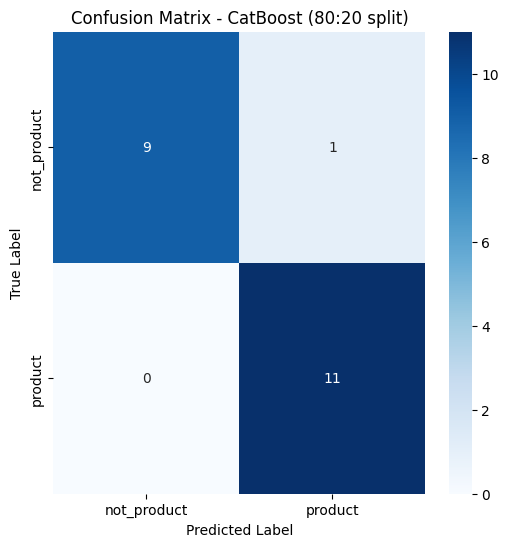


Evaluating AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Classification Report for AdaBoost:
              precision    recall  f1-score   support

 not_product       1.00      0.90      0.95        10
     product       0.92      1.00      0.96        11

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



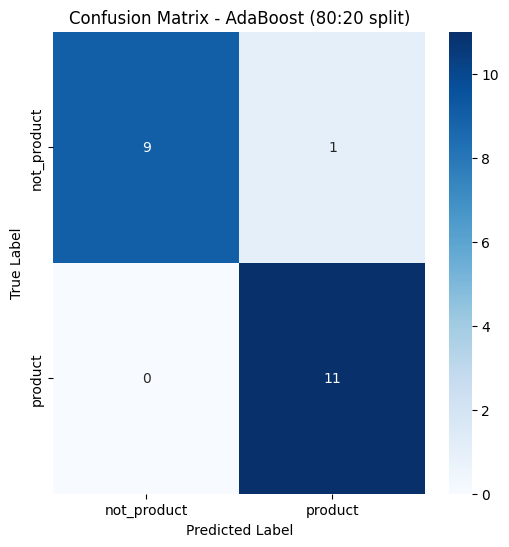


Evaluating Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

 not_product       1.00      0.90      0.95        10
     product       0.92      1.00      0.96        11

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



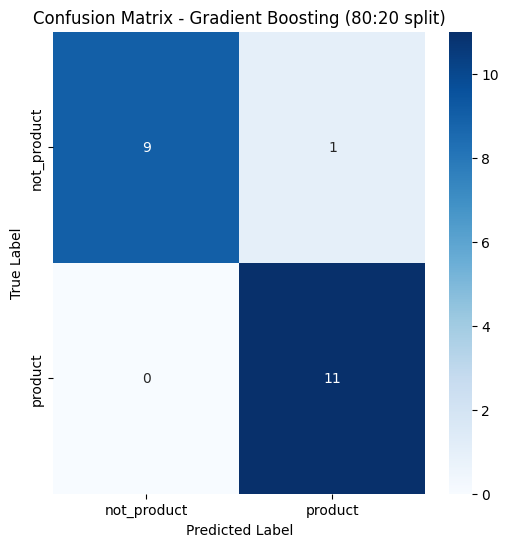


Model Comparison Results (80:20 split):
                 Model  CV Accuracy  Test Accuracy
0  Logistic Regression     0.975735       0.952381
1        Random Forest     0.950735       0.952381
2                  SVM     0.975735       1.000000
3             LightGBM     0.902206       0.952381
4             CatBoost     0.926471       0.952381
5             AdaBoost     0.938971       0.952381
6    Gradient Boosting     0.951471       0.952381


Evaluating with split ratio: 75:25
X_train shape: (77, 21)
y_train shape: (77,)

Debugging transformers with shapes:
Input shape: (77, 21)

Testing transformer: num
Columns: ['path_depth', 'url_length', 'path_length', 'query_length', 'product_keyword_count', 'non_product_keyword_count']
Output shape: (77, 6)

Testing transformer: cat
Columns: ['domain']
Output shape: (77, 12)

Testing transformer: binary
Columns: ['has_query', 'has_fragment', 'contains_dp', 'contains_product', 'contains_item', 'contains_pid', 'has_html', 'has_php', 'has_uuid',

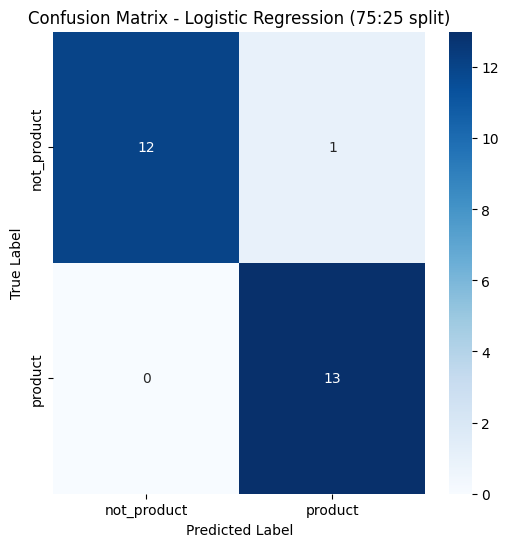


Evaluating Random Forest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report for Random Forest:
              precision    recall  f1-score   support

 not_product       1.00      0.92      0.96        13
     product       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



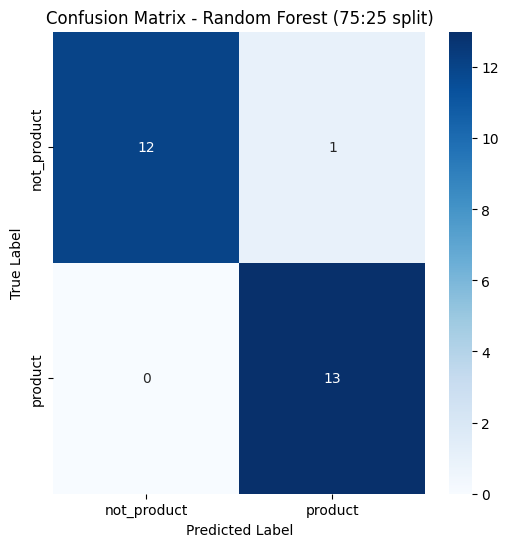


Evaluating SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Classification Report for SVM:
              precision    recall  f1-score   support

 not_product       1.00      0.92      0.96        13
     product       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



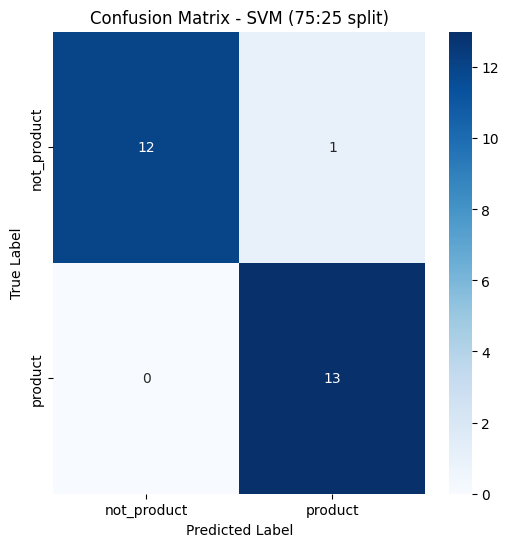


Evaluating LightGBM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 39, number of negative: 38
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 77, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

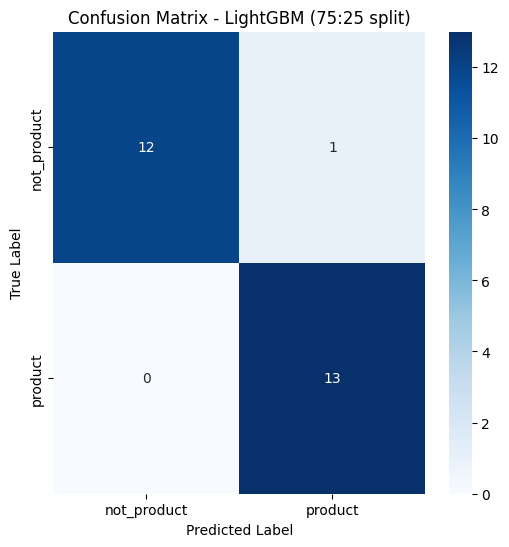


Evaluating CatBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report for CatBoost:
              precision    recall  f1-score   support

 not_product       1.00      0.92      0.96        13
     product       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



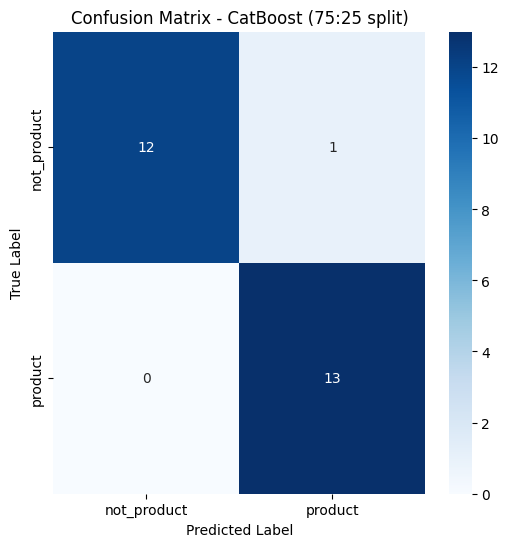


Evaluating AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Classification Report for AdaBoost:
              precision    recall  f1-score   support

 not_product       1.00      0.92      0.96        13
     product       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



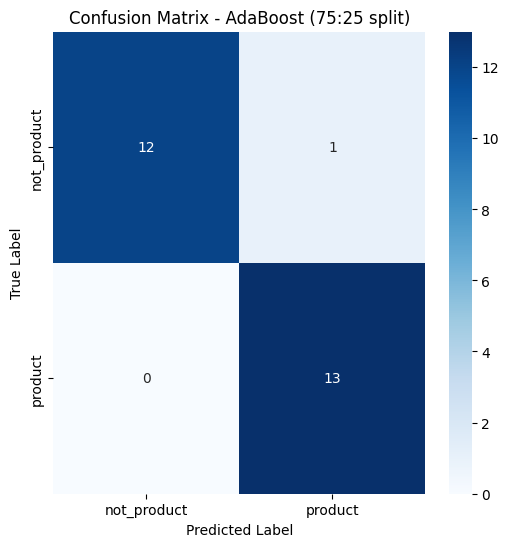


Evaluating Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

 not_product       1.00      0.92      0.96        13
     product       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



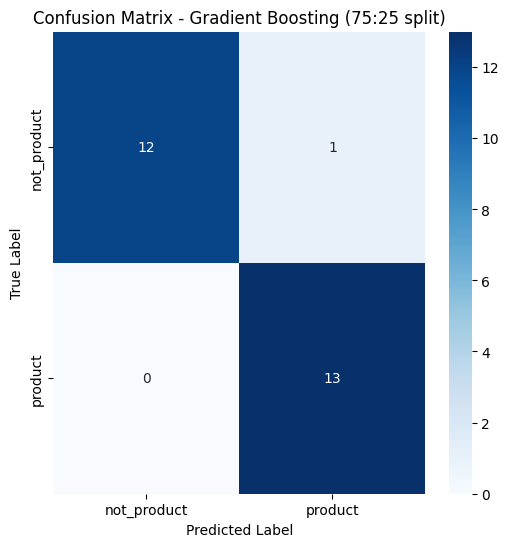


Model Comparison Results (75:25 split):
                 Model  CV Accuracy  Test Accuracy
0  Logistic Regression     0.960833       0.961538
1        Random Forest     0.974167       0.961538
2                  SVM     0.960833       0.961538
3             LightGBM     0.935000       0.961538
4             CatBoost     0.961667       0.961538
5             AdaBoost     0.974167       0.961538
6    Gradient Boosting     0.948333       0.961538


Final Model Comparison Across All Split Ratios:
                  Model Split Ratio  CV Accuracy  Test Accuracy
0   Logistic Regression       90:10     0.967836       1.000000
1         Random Forest       90:10     0.956725       1.000000
2                   SVM       90:10     0.967836       1.000000
3              LightGBM       90:10     0.923977       1.000000
4              CatBoost       90:10     0.946199       1.000000
5              AdaBoost       90:10     0.956725       1.000000
6     Gradient Boosting       90:10     0.946784     

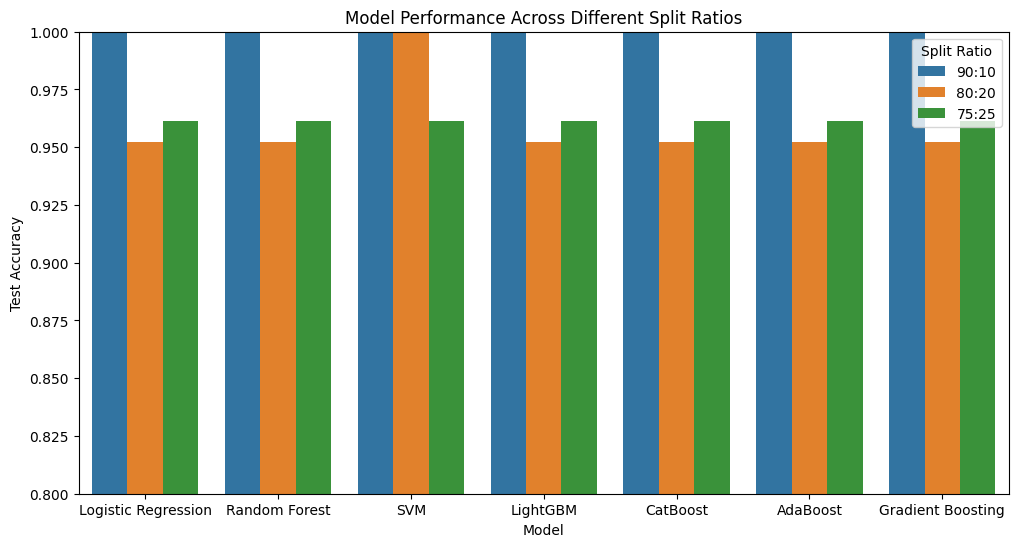


Best Model: Logistic Regression with 90:10 split ratio (Test Accuracy: 100.00%)
Transformed shape: (77, 131)
num -> (77, 6)
cat -> (77, 12)
binary -> (77, 13)
text -> (77, 100)


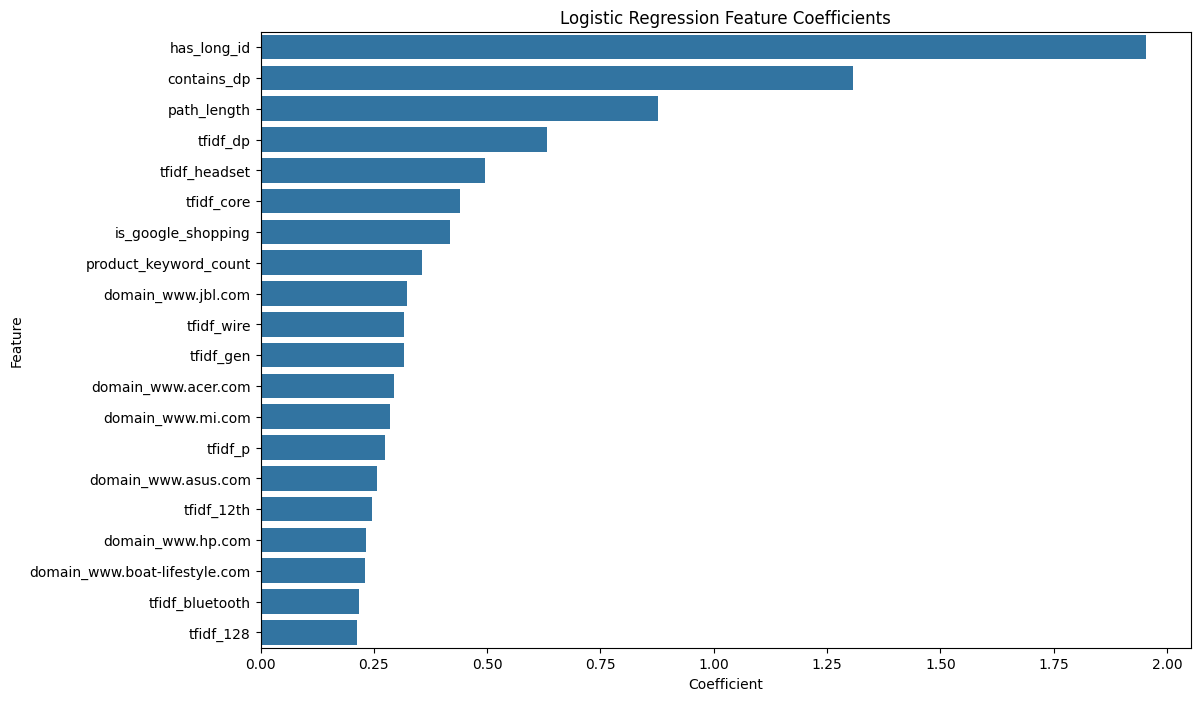


Evaluation Report:
Best Model: Logistic Regression
Split Ratio: 90:10
Test Accuracy: 1.00
CV Accuracy: 0.97
ROC AUC: 1.00
Average Precision: 1.00

Classification Report:
              precision  recall  f1-score  support
not_product         1.0     1.0       1.0     13.0
product             1.0     1.0       1.0     13.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     26.0
weighted avg        1.0     1.0       1.0     26.0

Confusion Matrix:
                  Pred not_product  Pred product
True not_product                13             0
True product                     0            13

Sample Correct Predictions:
True: product, Predicted: product, Prob: 0.77
True: product, Predicted: product, Prob: 0.95
True: product, Predicted: product, Prob: 0.94

Sample Incorrect Predictions:


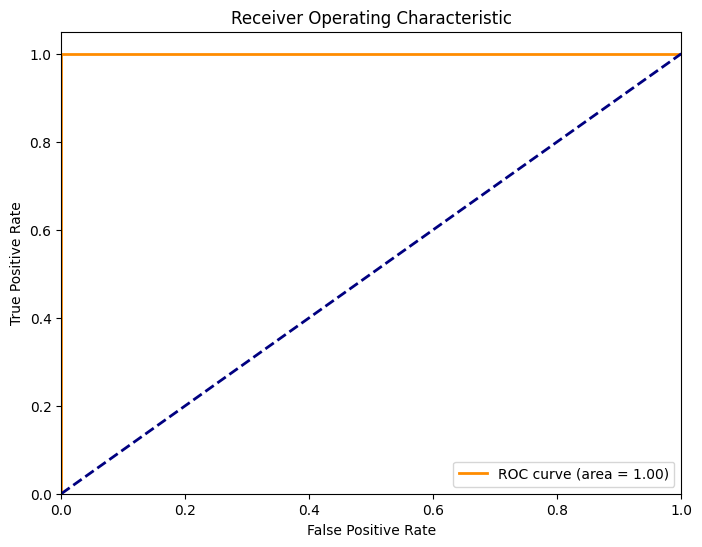

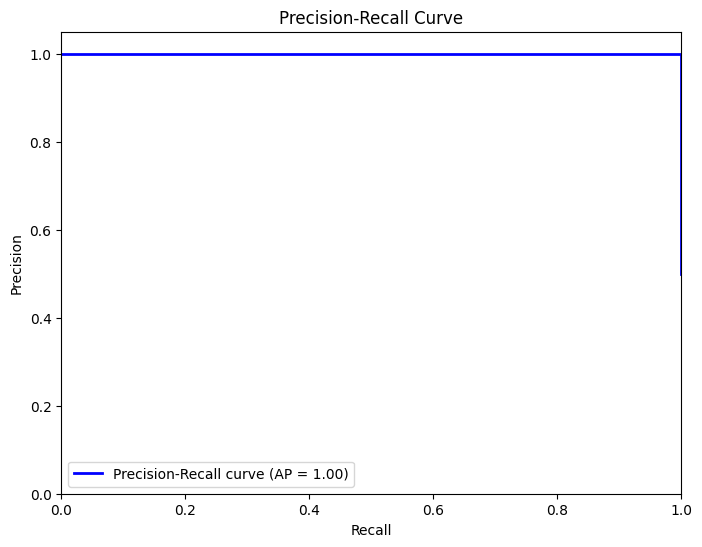

In [15]:
# First, let's verify the feature extraction worked
print("Columns after feature extraction:", df.columns.tolist())

# Check if our numeric features exist
numeric_features = ['path_depth', 'url_length', 'path_length', 'query_length',
                   'product_keyword_count', 'non_product_keyword_count']
missing_numeric = [col for col in numeric_features if col not in df.columns]
if missing_numeric:
    print(f"Warning: Missing numeric features: {missing_numeric}")
    # Remove missing features from the list
    numeric_features = [col for col in numeric_features if col in df.columns]

# Similarly check other feature types
categorical_features = ['domain']
if 'domain' not in df.columns:
    print("Warning: 'domain' feature missing")
    categorical_features = []

binary_features = [col for col in df.columns if col not in numeric_features + categorical_features +
                  ['url', 'label', 'cleaned_url_text', 'label_num']]
text_features = ['cleaned_url_text'] if 'cleaned_url_text' in df.columns else []

print("\nFinal feature sets:")
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)
print("Binary:", binary_features)
print("Text:", text_features)

# Now redefine the transformers with the verified features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
]) if numeric_features else ('drop', 'drop')

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
]) if categorical_features else ('drop', 'drop')

binary_transformer = Pipeline(steps=[
    ('passthrough', 'passthrough')
]) if binary_features else ('drop', 'drop')

# Add these helper functions at the module level (top level of the script)

def squeeze_text(x):
    """Helper function to replace the lambda in FunctionTransformer"""
    return x.astype(str).to_numpy().ravel()

def simple_tokenizer(x):
    """Helper function to replace the lambda tokenizer"""
    return x.split()

def text_preprocessor(x):
    """Helper function to replace the lambda preprocessor"""
    return x if isinstance(x, str) else 'url'

# Then modify the text_transformer definition:
text_transformer = Pipeline(steps=[
    ('squeeze', FunctionTransformer(squeeze_text, validate=False)),
    ('tfidf', TfidfVectorizer(
        max_features=100,
        tokenizer=simple_tokenizer,
        preprocessor=text_preprocessor,
        token_pattern=None,
        min_df=1
    ))
])

binary_transformer = 'passthrough'

required_columns = numeric_features + categorical_features + binary_features + text_features
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns: {missing_columns}")
    # Handle missing columns - either create them with default values or remove from features
    for col in missing_columns:
        if col in numeric_features:
            df[col] = 0  # Default numeric value
        elif col in categorical_features:
            df[col] = 'unknown'  # Default category
        elif col in text_features:
            df[col] = 'url'  # Default text

# Update the preprocessor configuration
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_features),
        ('text', text_transformer, text_features)
    ],
    remainder='drop',
    verbose_feature_names_out=False,
    n_jobs=1
)



# Now debug the transformers
def debug_transformers(preprocessor, X):
    print("\nDebugging transformers with shapes:")
    print(f"Input shape: {X.shape}")

    # Fit the whole preprocessor first so transformers_ exists
    try:
        preprocessor.fit(X)
    except Exception as e:
        print(f"Warning: preprocessor.fit(X) raised an exception: {e}")
        # Continue — we will still attempt to inspect transformers (some may be unfitted)

    # Use transformers_ (fitted form) if available, else fall back to transformers (initial)
    transformer_list = getattr(preprocessor, 'transformers_', preprocessor.transformers)

    for name, transformer, cols in transformer_list:
        if name == 'remainder':
            continue
        print(f"\nTesting transformer: {name}")
        print(f"Columns: {cols}")

        # Verify columns exist
        missing = [c for c in cols if c not in X.columns]
        if missing:
            print(f"Missing columns: {missing}")
            continue

        # Handle 'drop' and 'passthrough' specially
        if transformer == 'drop':
            print("Transformer is 'drop' -> output: zero columns")
            continue
        if transformer == 'passthrough':
            arr = X[cols].to_numpy()
            print(f"Output shape (passthrough): {arr.shape}")
            continue

        # If transformer is a tuple like ('drop','drop') or similar, normalize it
        if isinstance(transformer, tuple) and len(transformer) == 2 and transformer[0] == 'drop':
            print("Transformer is configured as drop tuple -> output: zero columns")
            continue

        try:
            # If transformer is a Pipeline or estimator, fit_transform on the slice
            t = transformer.fit_transform(X[cols])

            # If sparse - print nnz info, otherwise shape
            if hasattr(t, 'shape'):
                print(f"Output shape: {t.shape}")
            elif hasattr(t, 'nnz'):
                print(f"Sparse matrix with nonzero elements: {t.nnz}")
            else:
                print(f"Output type: {type(t)}")
        except Exception as e:
            print(f"Error in {name}: {str(e)}")


# Recompute scale_pos_weight for XGBoost (uses existing df)
scale_pos = len(df[df['label'] == 'not_product']) / max(1, len(df[df['label'] == 'product']))

# Models dictionary (complete)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(random_state=42, probability=True, class_weight='balanced'),
    # 'XGBoost': XGBClassifier(random_state=42, scale_pos_weight=scale_pos, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# Parameter grids for GridSearchCV (keys correspond to pipeline named 'classifier')
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']  # keep to compatible penalty to avoid solver/param issues
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2, 5]
    },
    'SVM': {
        'classifier__C': [0.1, 1],
        'classifier__kernel': ['linear', 'rbf']
    },
    'LightGBM': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [ -1, 10],     # -1 indicates no limit in LightGBM
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__num_leaves': [31, 63]
    },
    'CatBoost': {
        'classifier__iterations': [100, 200],
        'classifier__depth': [4, 6],
        'classifier__learning_rate': [0.03, 0.1]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.5, 1.0]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    },

}

# Split ratios to evaluate
split_ratios = [
    {'train_size': 0.9, 'test_size': 0.1, 'name': '90:10'},
    {'train_size': 0.8, 'test_size': 0.2, 'name': '80:20'},
    {'train_size': 0.75, 'test_size': 0.25, 'name': '75:25'}
]

# Store results for all split ratios
all_results = []

for split in split_ratios:
    print(f"\n\n{'='*50}")
    print(f"Evaluating with split ratio: {split['name']}")
    print(f"{'='*50}")

    # Split data into features and target
    X = df.drop(['url', 'label', 'label_num'], axis=1)
    y = df['label']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=split['test_size'], random_state=42, stratify=y
    )

    # Reset indices to ensure alignment
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    # Verify shapes before fitting
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")

    debug_transformers(preprocessor, X_train)

    # Check text features before modeling
    if text_features:
        print("\nText feature analysis:")
        text_col = text_features[0]
        print(f"Empty strings: {sum(X_train[text_col].str.strip() == '')}")
        print(f"Sample texts:\n{X_train[text_col].head()}")

    # Ensure no empty strings
    X_train[text_col] = X_train[text_col].replace('', 'url')
    X_test[text_col] = X_test[text_col].replace('', 'url')

    # Evaluate each model with cross-validation
    results = []

    for model_name in models:
        print(f"\nEvaluating {model_name}...")

        # Create pipeline with feature selection
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', models[model_name])
        ])

        # Set up stratified k-fold cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Grid search for hyperparameter tuning
        grid_search = GridSearchCV(
            pipeline,
            param_grid=param_grids[model_name],
            cv=cv,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X_train, y_train)

        # Get best model and its performance
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Evaluate on test set
        y_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results.append({
            'Model': model_name,
            'Best Params': best_params,
            'CV Accuracy': best_score,
            'Test Accuracy': test_accuracy,
            'Model Object': best_model,
            'Split Ratio': split['name']
        })

        # Print classification report
        print(f"\nClassification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['not_product', 'product'],
                    yticklabels=['not_product', 'product'])
        plt.title(f'Confusion Matrix - {model_name} ({split["name"]} split)')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    # Display results in a DataFrame
    results_df = pd.DataFrame(results)
    print(f"\nModel Comparison Results ({split['name']} split):")
    print(results_df[['Model', 'CV Accuracy', 'Test Accuracy']])

    # Store all results
    all_results.extend(results)

# Combine all results
final_results_df = pd.DataFrame(all_results)

# Display final comparison
print("\n\nFinal Model Comparison Across All Split Ratios:")
print(final_results_df[['Model', 'Split Ratio', 'CV Accuracy', 'Test Accuracy']].sort_values('Test Accuracy', ascending=False))

# Plot performance across split ratios
plt.figure(figsize=(12, 6))
sns.barplot(data=final_results_df, x='Model', y='Test Accuracy', hue='Split Ratio')
plt.title('Model Performance Across Different Split Ratios')
plt.ylim(0.8, 1.0)
plt.show()

# Get the best model overall
best_model_info = final_results_df.loc[final_results_df['Test Accuracy'].idxmax()]
best_model = best_model_info['Model Object']
model_name = best_model_info['Model']
split_ratio = best_model_info['Split Ratio']

print(f"\nBest Model: {model_name} with {split_ratio} split ratio (Test Accuracy: {best_model_info['Test Accuracy']:.2%})")

# Save the best model
joblib.dump(best_model, f'best_{model_name.lower().replace(" ", "_")}_model_{split_ratio.replace(":", "_")}.pkl')

def inspect_transformed_features(preprocessor, X_sample):
    """Inspect the transformed features to check dimensions"""
    # Fit & transform to confirm shapes line up
    preprocessor.fit(X_train)
    Xt = preprocessor.transform(X_train)
    print("Transformed shape:", Xt.shape)

    # Inspect individual transformer outputs (optional)
    for name, transformer, cols in preprocessor.transformers_:
        if name == 'remainder':
            continue
        if transformer == 'passthrough':
            out = X_train[cols].to_numpy()
        else:
            out = transformer.transform(X_train[cols])
        print(name, "->", getattr(out, "shape", type(out)))


# Test with a small sample
inspect_transformed_features(preprocessor, X_train.head())

# Feature importance analysis - Fixed version
if model_name == 'Random Forest':
    rf_model = best_model.named_steps['classifier']
    importances = rf_model.feature_importances_

    # Get feature names after preprocessing
    feature_names = []
    for name, transformer, features in best_model.named_steps['preprocessor'].transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            if name == 'binary':
                feature_names.extend(features)
            elif name == 'text':
                # For TF-IDF features
                tfidf_features = transformer.named_steps['tfidf'].get_feature_names_out()
                feature_names.extend([f"tfidf_{f}" for f in tfidf_features])
            else:
                feature_names.extend(transformer.get_feature_names_out(features))
        else:
            feature_names.extend(features)

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False).head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Random Forest Feature Importances')
    plt.show()

elif model_name == 'Logistic Regression':
    lr_model = best_model.named_steps['classifier']
    coefficients = lr_model.coef_[0]

    # Get feature names after preprocessing
    feature_names = []
    for name, transformer, features in best_model.named_steps['preprocessor'].transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            if name == 'binary':
                feature_names.extend(features)
            elif name == 'text':
                # For TF-IDF features
                tfidf_features = transformer.named_steps['tfidf'].get_feature_names_out()
                feature_names.extend([f"tfidf_{f}" for f in tfidf_features])
            else:
                feature_names.extend(transformer.get_feature_names_out(features))
        else:
            feature_names.extend(features)

    # Create a DataFrame for visualization
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values('Coefficient', ascending=False).head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title('Logistic Regression Feature Coefficients')
    plt.show()

elif model_name == 'SVM':
    print("SVM doesn't provide direct feature importance measures")


# Generate evaluation report
def generate_evaluation_report(results_df, X_test, y_test):

    # Get the best model
    best_model_info = results_df.loc[results_df['Test Accuracy'].idxmax()]
    best_model = best_model_info['Model Object']
    model_name = best_model_info['Model']
    split_ratio = best_model_info['Split Ratio']

    # Make predictions
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Get classification report
    clf_report = classification_report(y_test, y_pred, output_dict=True)

    # Get confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='product')
    roc_auc = auc(fpr, tpr)

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label='product')
    avg_precision = average_precision_score(y_test, y_pred_proba, pos_label='product')

    # Get some examples of correct and incorrect predictions
    X_test_df = X_test.copy()
    X_test_df['true_label'] = y_test
    X_test_df['predicted_label'] = y_pred
    X_test_df['probability'] = y_pred_proba

    correct_examples = X_test_df[X_test_df['true_label'] == X_test_df['predicted_label']]
    incorrect_examples = X_test_df[X_test_df['true_label'] != X_test_df['predicted_label']]

    # Return report
    return {
        'model_name': model_name,
        'split_ratio': split_ratio,
        'test_accuracy': best_model_info['Test Accuracy'],
        'cv_accuracy': best_model_info['CV Accuracy'],
        'classification_report': clf_report,
        'confusion_matrix': cm.tolist(),
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall,
        'avg_precision': avg_precision,
        'correct_examples': correct_examples.sample(min(3, len(correct_examples))).to_dict('records'),
        'incorrect_examples': incorrect_examples.sample(min(3, len(incorrect_examples))).to_dict('records'),
        'best_params': best_model_info['Best Params']
    }

# Generate and print the report
report = generate_evaluation_report(final_results_df, X_test, y_test)
print("\nEvaluation Report:")
print(f"Best Model: {report['model_name']}")
print(f"Split Ratio: {report['split_ratio']}")
print(f"Test Accuracy: {report['test_accuracy']:.2f}")
print(f"CV Accuracy: {report['cv_accuracy']:.2f}")
print(f"ROC AUC: {report['roc_auc']:.2f}")
print(f"Average Precision: {report['avg_precision']:.2f}")
print("\nClassification Report:")
print(pd.DataFrame(report['classification_report']).transpose())
print("\nConfusion Matrix:")
print(pd.DataFrame(report['confusion_matrix'],
                  index=['True not_product', 'True product'],
                  columns=['Pred not_product', 'Pred product']))
print("\nSample Correct Predictions:")
for example in report['correct_examples']:
    print(f"True: {example['true_label']}, Predicted: {example['predicted_label']}, Prob: {example['probability']:.2f}")
print("\nSample Incorrect Predictions:")
for example in report['incorrect_examples']:
    print(f"True: {example['true_label']}, Predicted: {example['predicted_label']}, Prob: {example['probability']:.2f}")

# Plot ROC curve using values from the report
plt.figure(figsize=(8, 6))
plt.plot(report['fpr'], report['tpr'], color='darkorange', lw=2,
         label=f'ROC curve (area = {report["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve using values from the report
plt.figure(figsize=(8, 6))
plt.plot(report['recall'], report['precision'], color='blue', lw=2,
         label=f'Precision-Recall curve (AP = {report["avg_precision"]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

***Robust prediction for a single URL using a fitted pipeline***

In [16]:
def predict_url_type(url, model):

    try:
        # 1) Build raw feature row from the URL (same extractor used during training)
        url_df = pd.DataFrame([{'url': url}])
        url_features = url_df['url'].apply(lambda x: pd.Series(extract_url_features(x)))
        url_df = pd.concat([url_df, url_features], axis=1)

        # Ensure domain exists for the single-row DF (use parsed.netloc to avoid ambiguous Series logic)
        parsed = urlparse(url)
        # Overwrite or set domain safely for the single-row DataFrame:
        url_df['domain'] = parsed.netloc

        # 2) Get the preprocessor from the trained pipeline
        pre = model.named_steps.get('preprocessor', None)
        if pre is None:
            # Try to find a ColumnTransformer among steps
            for step_name, step_obj in model.named_steps.items():
                if step_obj.__class__.__name__ == 'ColumnTransformer':
                    pre = step_obj
                    break
        if pre is None:
            raise RuntimeError("Preprocessor (ColumnTransformer) not found in pipeline.named_steps.")

        # 3) Determine required input columns for the preprocessor
        if hasattr(pre, 'feature_names_in_') and pre.feature_names_in_ is not None:
            required_cols = list(pre.feature_names_in_)
        else:
            # Fallback: collect column names from transformers_ (only include string column names)
            required_cols = []
            for name, transformer, cols in pre.transformers_:
                if name == 'remainder':
                    continue
                # cols could be a list/tuple/index or a single string
                if isinstance(cols, (list, tuple, pd.Index, np.ndarray)):
                    for c in cols:
                        if isinstance(c, str):
                            required_cols.append(c)
                elif isinstance(cols, str):
                    required_cols.append(cols)
                else:
                    # ignore non-string column selectors (e.g., slice, callable)
                    continue
            # remove duplicates while preserving order
            seen = set()
            required_cols = [x for x in required_cols if not (x in seen or seen.add(x))]

        # 4) Ensure url_df contains all required columns; fill with safe defaults
        for col in required_cols:
            if col not in url_df.columns:
                # Text-like columns get URL, domain-like get parsed.netloc, otherwise numeric/binary default 0
                low = col.lower()
                if 'text' in low or 'clean' in low or 'url' in low:
                    url_df[col] = url
                elif 'domain' in low:
                    url_df[col] = parsed.netloc
                else:
                    url_df[col] = 0

        # 5) Keep only required columns in same order (if required_cols empty, use all columns except url)
        if required_cols:
            X_row = url_df[required_cols]
        else:
            X_row = url_df.drop(columns=['url'], errors='ignore')

        # 6) Predict using pipeline (it will apply preprocessor internally)
        pred = model.predict(X_row)[0]

        # 7) Get probability / class probs if available
        classifier = model.named_steps.get('classifier', None)
        if classifier is None:
            # fallback to last step
            classifier = model.steps[-1][1]

        class_probs = {}
        top_prob = None
        if hasattr(model, 'predict_proba'):
            proba_arr = model.predict_proba(X_row)[0]
            # Try to get class ordering from classifier.classes_
            if hasattr(classifier, 'classes_'):
                classes = list(classifier.classes_)
            elif hasattr(model, 'classes_'):
                classes = list(model.classes_)
            else:
                # fallback label names (best-effort)
                classes = ['not_product', 'product'] if len(proba_arr) == 2 else [f'class_{i}' for i in range(len(proba_arr))]
            class_probs = {classes[i]: float(proba_arr[i]) for i in range(len(proba_arr))}
            top_prob = float(max(proba_arr))
        else:
            # predict_proba is not available
            if hasattr(classifier, 'classes_'):
                for c in classifier.classes_:
                    class_probs[c] = None
            else:
                class_probs = {'not_product': None, 'product': None}

        return {
            'prediction': pred,
            'probability': top_prob,
            'details': class_probs
        }

    except Exception as e:
        print(f"Error processing URL: {url}")
        print(f"Error details: {str(e)}")
        return {
            'prediction': 'error',
            'probability': 0.0,
            'details': {
                'class_0_prob': 0.0,
                'class_1_prob': 0.0
            }
        }

test_urls = [
    # Product URLs (10 examples)
    "(https://www.amazon.in/Noise-Launched-BluetoothCalling-Tracking/dp/B0BJ72WZQ7",  # Amazon product page
    "https://www.flipkart.com/apple-iphone-13-blue-128-gb/p/itm6e3b5b5a7cfd9",  # Flipkart product
    "https://www.myntra.com/smart-watches/noise/noise-crew-smartwatch/23529198/buy",  # Myntra product
    "https://www.nykaa.com/lakme-absolute-matte-revolution-lip-color/p/385961",  # Nykaa product
    "https://www.reliancedigital.in/samsung-galaxy-s23-ultra-5g-phantom-black-256-gb/p/493177762",  # Reliance Digital
    "https://www.croma.com/apple-iphone-14-pro-128gb-deep-purple-/p/261651",  # Croma product
    "https://www.tatacliq.com/sony-playstation-5-digital-edition/p-mp000000009069189",  # Tata Cliq
    "https://www.snapdeal.com/product/boat-rockerz-255f-bluetooth-headset/643050960223",  # Snapdeal
    "https://www.meesho.com/levis-mens-slim-fit-jeans/p/1jhy9e",  # Meesho
    "https://www.ajio.com/levis-men-blue-slim-fit-mid-rise-clean-look-stretchable-jeans/p/4411200130",  # AJIO

    # Non-Product URLs (10 examples)
    "https://www.amazon.in/s?k=smartphones",  # Amazon search results
    "https://www.flipkart.com/search?q=laptops",  # Flipkart search
    "https://www.myntra.com/shop/men",  # Myntra category page
    "https://www.nykaa.com/brands/nykaa-cosmetics/cid/3221",  # Nykaa brand page
    "https://www.reliancedigital.in/televisions",  # Reliance Digital category
    "www.croma.com/computers-tablets/laptops/c/3",  # Croma category
    "https://www.tatacliq.com/electronics-tablets/c-msh1211",  # Tata Cliq category
    "https://www.snapdeal.com/products/mens-footwear-sports-shoes",  # Snapdeal category
    "https://www.meesho.com/women-clothing/pl/3f9",  # Meesho category
    "https://www.ajio.com/shop/men"  # AJIO category
]


print("\nSample Predictions:")
for url in test_urls:
    result = predict_url_type(url, best_model)
    prob = result.get('probability', None)
    prob_str = f"{prob:.2f}" if (prob is not None and isinstance(prob, (int, float))) else str(prob)
    print(f"\nURL: {url}")
    print(f"Prediction: {result['prediction']}")
    print(f"Probability: {prob_str}")
    print(f"Details: {result.get('details')}")


Sample Predictions:

URL: (https://www.amazon.in/Noise-Launched-BluetoothCalling-Tracking/dp/B0BJ72WZQ7
Prediction: product
Probability: 0.99
Details: {'not_product': 0.013573770102646265, 'product': 0.9864262298973537}

URL: https://www.flipkart.com/apple-iphone-13-blue-128-gb/p/itm6e3b5b5a7cfd9
Prediction: product
Probability: 0.77
Details: {'not_product': 0.22785967414594355, 'product': 0.7721403258540565}

URL: https://www.myntra.com/smart-watches/noise/noise-crew-smartwatch/23529198/buy
Prediction: product
Probability: 0.57
Details: {'not_product': 0.4301285251171145, 'product': 0.5698714748828855}

URL: https://www.nykaa.com/lakme-absolute-matte-revolution-lip-color/p/385961
Prediction: product
Probability: 0.64
Details: {'not_product': 0.3615240181513727, 'product': 0.6384759818486273}

URL: https://www.reliancedigital.in/samsung-galaxy-s23-ultra-5g-phantom-black-256-gb/p/493177762
Prediction: product
Probability: 0.78
Details: {'not_product': 0.21850181740987518, 'product': 0.